# Time Series Analysis

### 1. Import Libraries and Dataset
### 2. Analyze and Prep Datasets
### 3. Time-Series Analysis: Decomposition
### 4. Testing for Stationary
### 5. Stationarizing the Data

##  Import Libraries and Dataset

Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

Import Dataset

In [3]:
path = r'C:\Users\kacee\OneDrive\Desktop\Project6'

In [4]:
# Importing House Data
df= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Geospatial_Complete_Data.csv'), index_col = False)

## Analyze and Prep Dataset

In [5]:
df.head()

,Unnamed: 0,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income,3.085657,11.279589,32.408006,12168.0
1,1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income,2.901672,8.836706,34.462893,13000.0
2,2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income,4.304473,14.069316,23.231649,14352.0
3,3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income,5.894460,20.194903,16.965082,16640.0
4,4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income,3.780757,15.779048,26.449727,14601.6


In [6]:
df = df.drop(columns =['Unnamed: 0'])

In [7]:
df.shape

(720, 11)

In [8]:
df.head(20)

,Year,State,House Cost,Income,State_Minimum_Wage,House Category,Income Category,Multiplied_Income,Multiplied_Wage,Income_Percentage,Minimum_Wage_Yearly
0,2008,AL,137250.036361,44480.0,5.85,Low Median Price,Low Income,3.085657,11.279589,32.408006,12168.0
1,2008,AR,114877.181812,39590.0,6.25,Low Median Price,Low Income,2.901672,8.836706,34.462893,13000.0
2,2008,AZ,201922.818171,46910.0,6.90,Middle Median Price,Low Income,4.304473,14.069316,23.231649,14352.0
3,2008,CA,336043.181811,57010.0,8.00,High Median Price,Middle Income,5.894460,20.194903,16.965082,16640.0
4,2008,CO,230399.352287,60940.0,7.02,Middle Median Price,Middle Income,3.780757,15.779048,26.449727,14601.6
5,2008,CT,269690.000000,64680.0,7.65,Middle Median Price,Middle Income,4.169604,16.948844,23.983092,15912.0
6,2008,DE,210382.954550,50700.0,7.15,Middle Median Price,Low Income,4.149565,14.146245,24.098911,14872.0
7,2008,FL,191100.059283,44860.0,6.79,Middle Median Price,Low Income,4.259921,13.530932,23.474613,14123.2
8,2008,GA,135955.603904,46230.0,5.15,Low Median Price,Low Income,2.940852,12.691897,34.003747,10712.0
9,2008,HI,395057.272733,61520.0,7.25,High Median Price,Middle Income,6.421607,26.197432,15.572426,15080.0


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['Year', 'State', 'House Cost', 'Income', 'State_Minimum_Wage',
       'House Category', 'Income Category', 'Multiplied_Income',
       'Multiplied_Wage', 'Income_Percentage', 'Minimum_Wage_Yearly'],
      dtype='object')

In [11]:
df.dtypes

Year                     int64
State                   object
House Cost             float64
Income                 float64
State_Minimum_Wage     float64
House Category          object
Income Category         object
Multiplied_Income      float64
Multiplied_Wage        float64
Income_Percentage      float64
Minimum_Wage_Yearly    float64
dtype: object

In [12]:
# Make Year columns str
df['Year'] = df['Year'].astype(int).astype(str)
df['State'] = df['State'].astype(object).astype(str)
df['House Category'] = df['House Category'].astype(object).astype(str)
df['Income Category'] = df['Income Category'].astype(object).astype(str)

In [13]:
sub1 = df.drop(columns =['House Category', 'Income Category', 'Multiplied_Wage', 'Income_Percentage'])

In [14]:
sub1

,Year,State,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Minimum_Wage_Yearly
0,2008,AL,137250.036361,44480.0,5.85,3.085657,12168.0
1,2008,AR,114877.181812,39590.0,6.25,2.901672,13000.0
2,2008,AZ,201922.818171,46910.0,6.90,4.304473,14352.0
3,2008,CA,336043.181811,57010.0,8.00,5.894460,16640.0
4,2008,CO,230399.352287,60940.0,7.02,3.780757,14601.6
...,...,...,...,...,...,...,...
715,2022,VA,319745.351833,85170.0,11.00,3.754202,22880.0
716,2022,WA,467987.500000,89430.0,14.49,5.233003,30139.2
717,2022,WI,223892.579371,73330.0,7.25,3.053219,15080.0
718,2022,WV,152927.083300,52460.0,7.25,2.915118,15080.0


In [15]:
# Make a Subset for CA
ca_data = sub1[sub1['State'] == 'CA']

In [16]:
# Make a Subset for FL
fl_data = sub1[sub1['State'] == 'FL']

In [17]:
# Make a Subset for AZ
az_data = sub1[sub1['State'] == 'AZ']

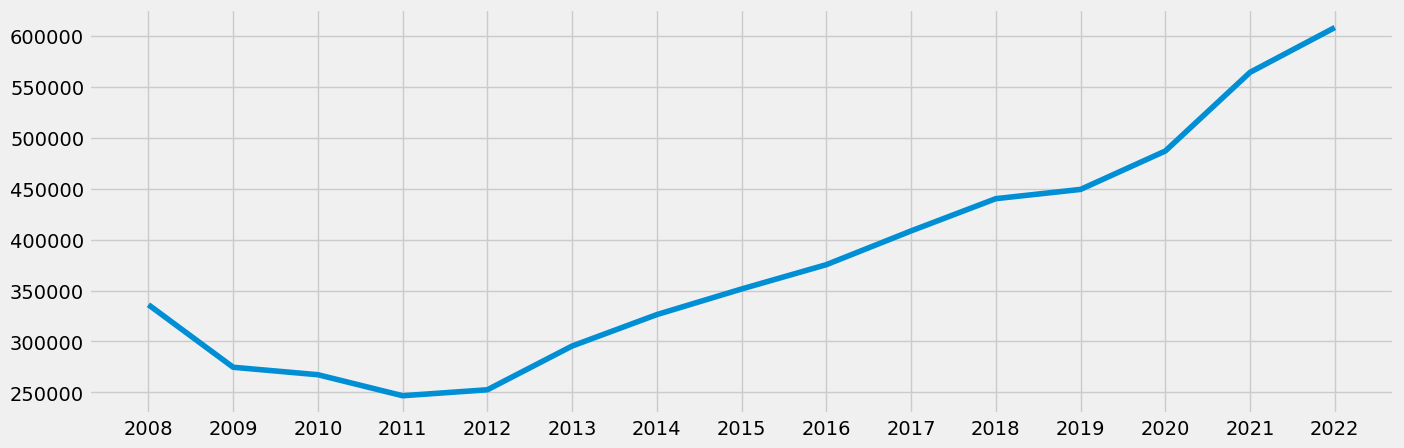

In [18]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data['Year'], ca_data['House Cost'])

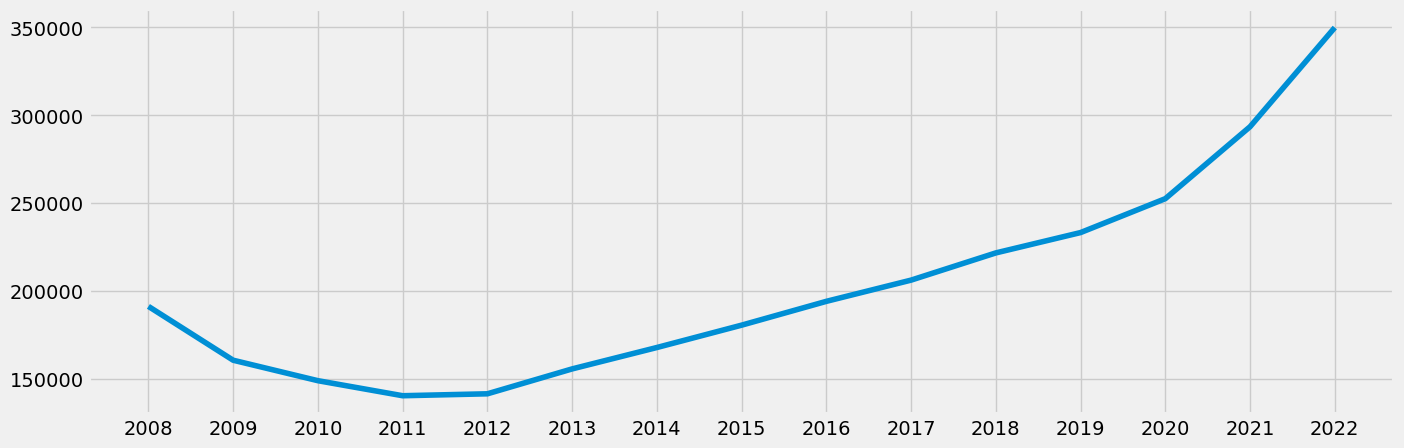

In [19]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data['Year'], fl_data['House Cost'])

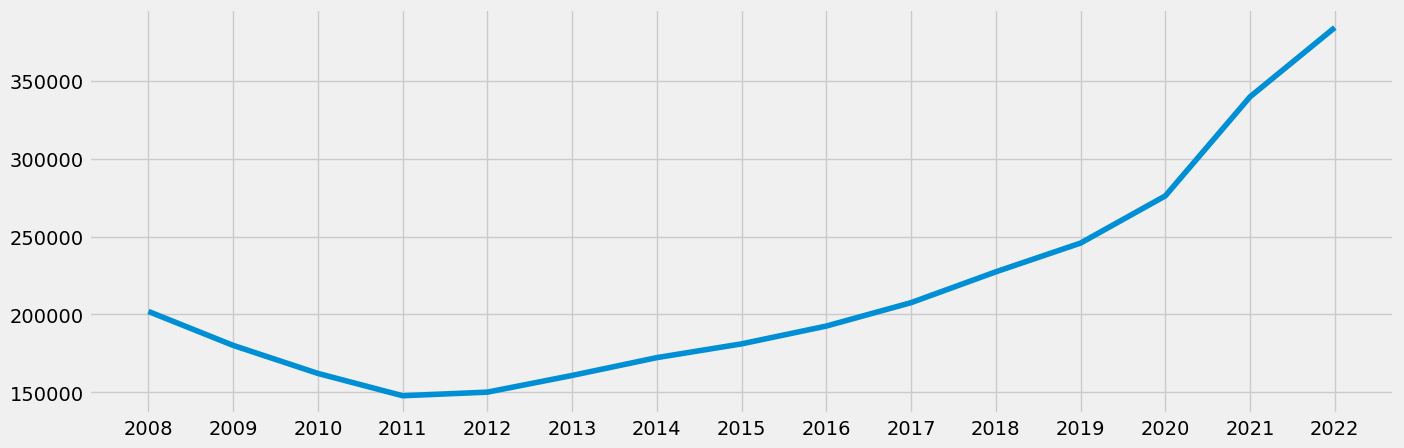

In [20]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data['Year'], az_data['House Cost'])

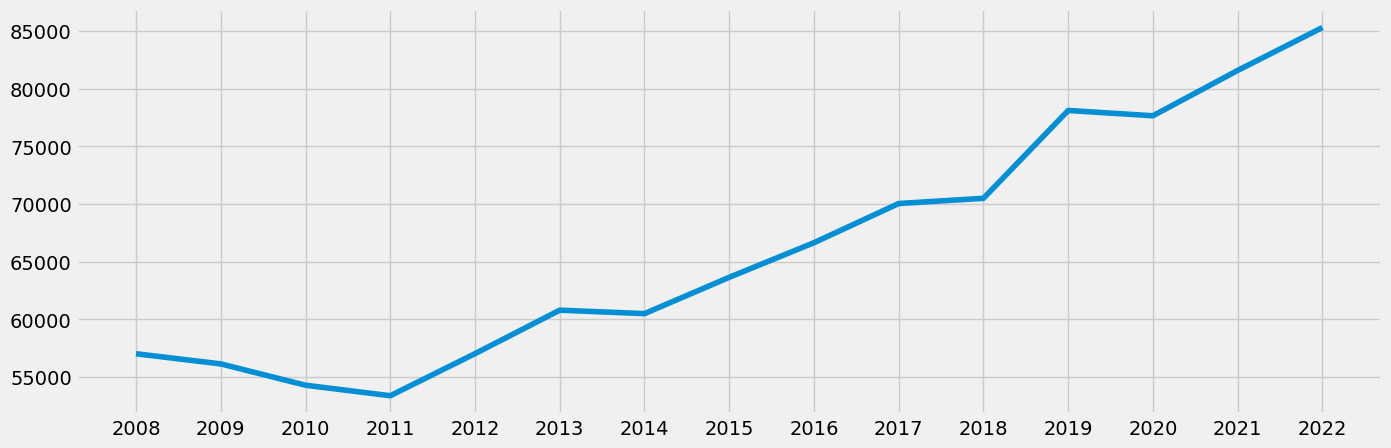

In [21]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data['Year'], ca_data['Income'])

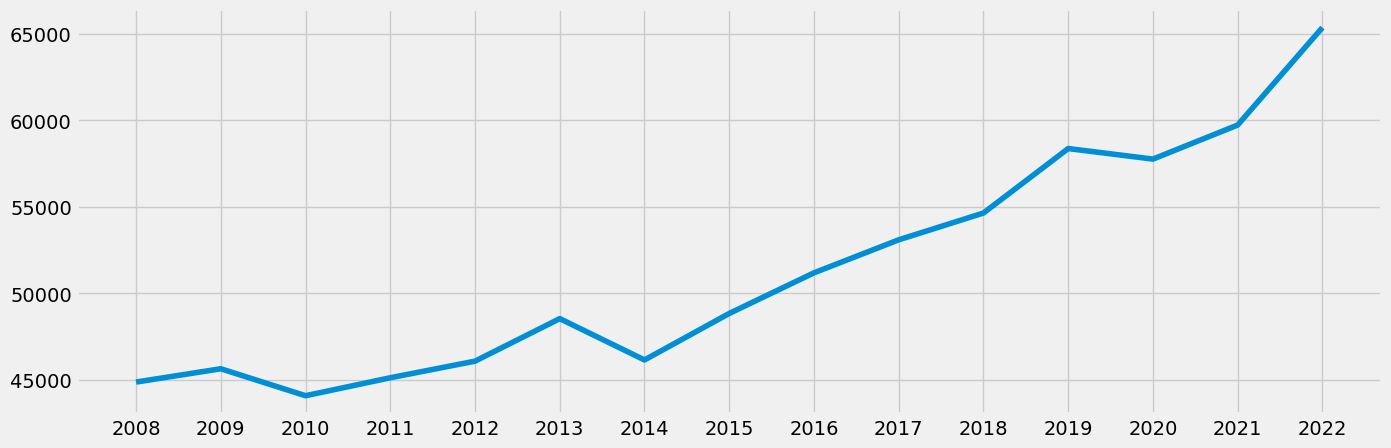

In [22]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data['Year'], fl_data['Income'])

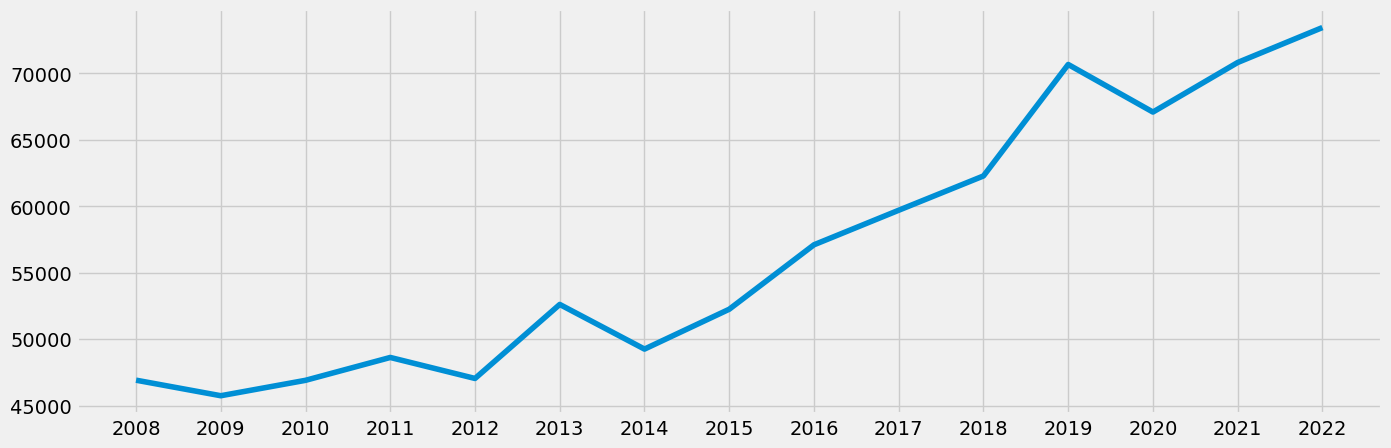

In [23]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data['Year'], az_data['Income'])

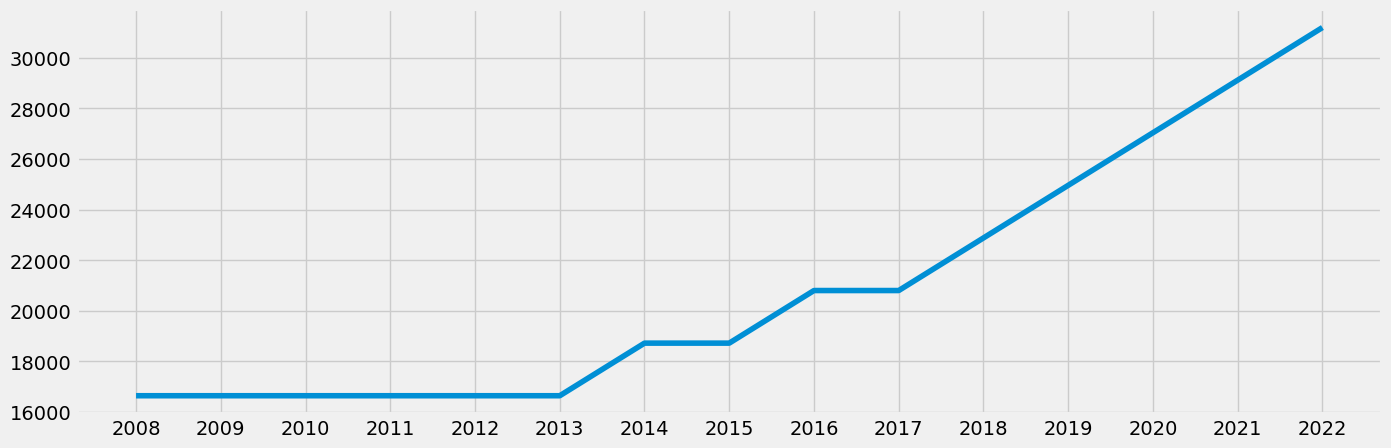

In [24]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data['Year'], ca_data['Minimum_Wage_Yearly'])

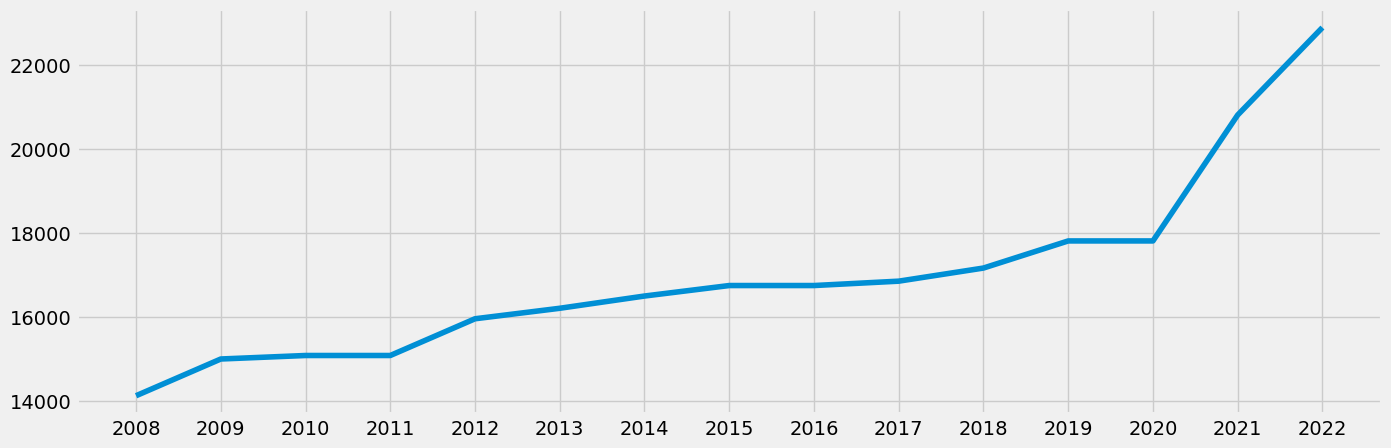

In [25]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data['Year'], fl_data['Minimum_Wage_Yearly'])

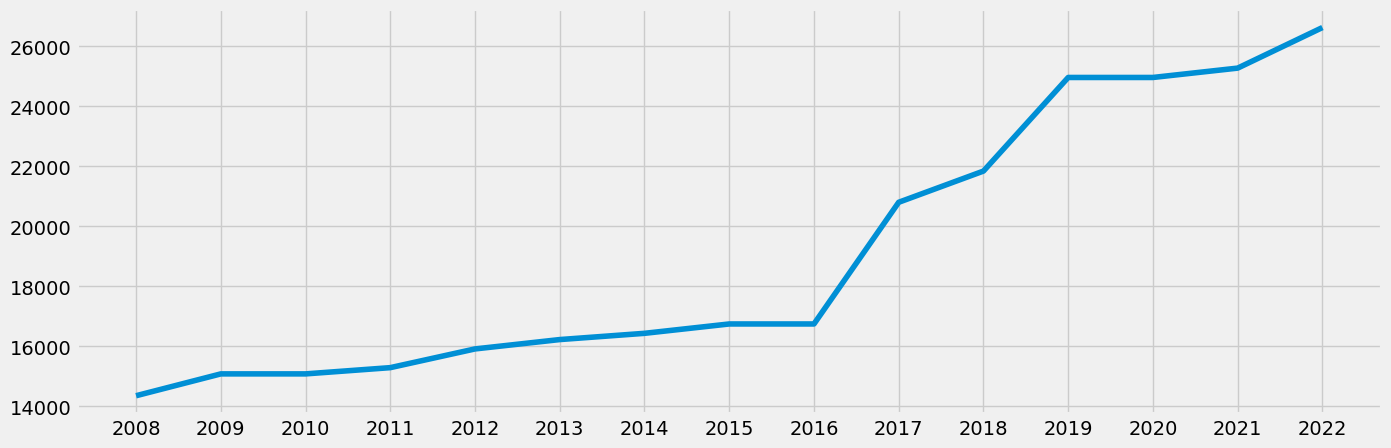

In [26]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data['Year'], az_data['Minimum_Wage_Yearly'])

In [27]:
ca_data['datetime'] = pd.to_datetime(ca_data['Year']) # Create a datetime column from year
ca_data = ca_data.set_index('datetime') # Set the datetime as the index of the dataframe.
ca_data.drop(['Year'], axis=1, inplace=True) # Drop the year column.
ca_data.head()

,State,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Minimum_Wage_Yearly
datetime,,,,,,
2008-01-01,CA,336043.181811,57010.0,8.0,5.894460,16640.0
2009-01-01,CA,274605.098763,56130.0,8.0,4.892305,16640.0
2010-01-01,CA,267269.939659,54280.0,8.0,4.923912,16640.0
2011-01-01,CA,246635.455557,53370.0,8.0,4.621238,16640.0
2012-01-01,CA,252492.794440,57020.0,8.0,4.428144,16640.0


In [28]:
fl_data['datetime'] = pd.to_datetime(fl_data['Year']) # Create a datetime column from year
fl_data = fl_data.set_index('datetime') # Set the datetime as the index of the dataframe.
fl_data.drop(['Year'], axis=1, inplace=True) # Drop the year column.
fl_data.head()

,State,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Minimum_Wage_Yearly
datetime,,,,,,
2008-01-01,FL,191100.059283,44860.0,6.79,4.259921,14123.2
2009-01-01,FL,160446.021739,45630.0,7.21,3.516240,14996.8
2010-01-01,FL,148791.278993,44070.0,7.25,3.376249,15080.0
2011-01-01,FL,140227.641305,45110.0,7.25,3.108571,15080.0
2012-01-01,FL,141325.638883,46070.0,7.67,3.067628,15953.6


In [29]:
az_data['datetime'] = pd.to_datetime(az_data['Year']) # Create a datetime column from year
az_data = az_data.set_index('datetime') # Set the datetime as the index of the dataframe.
az_data.drop(['Year'], axis=1, inplace=True) # Drop the year column.
az_data.head()

,State,House Cost,Income,State_Minimum_Wage,Multiplied_Income,Minimum_Wage_Yearly
datetime,,,,,,
2008-01-01,AZ,201922.818171,46910.0,6.90,4.304473,14352.0
2009-01-01,AZ,180134.964271,45740.0,7.25,3.938237,15080.0
2010-01-01,AZ,162125.111750,46900.0,7.25,3.456825,15080.0
2011-01-01,AZ,147805.125422,48620.0,7.35,3.040007,15288.0
2012-01-01,AZ,150105.953711,47040.0,7.65,3.191028,15912.0


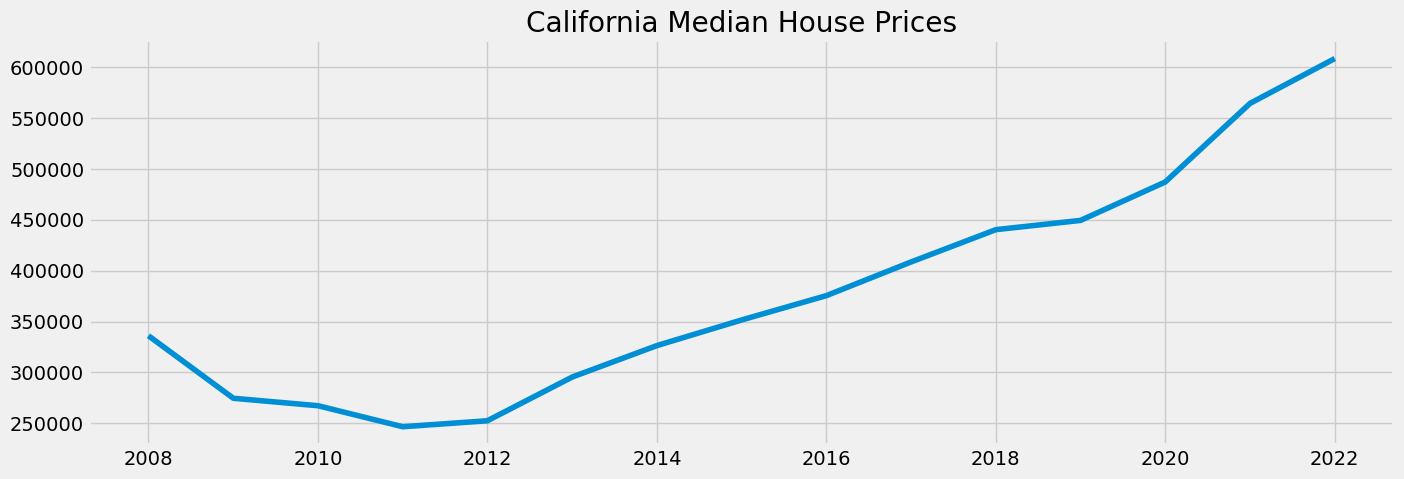

In [30]:
# Plot the new data set CA
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data.index, ca_data['House Cost'])
plt.title("California Median House Prices")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_house_ts_prep.png'), bbox_inches='tight')

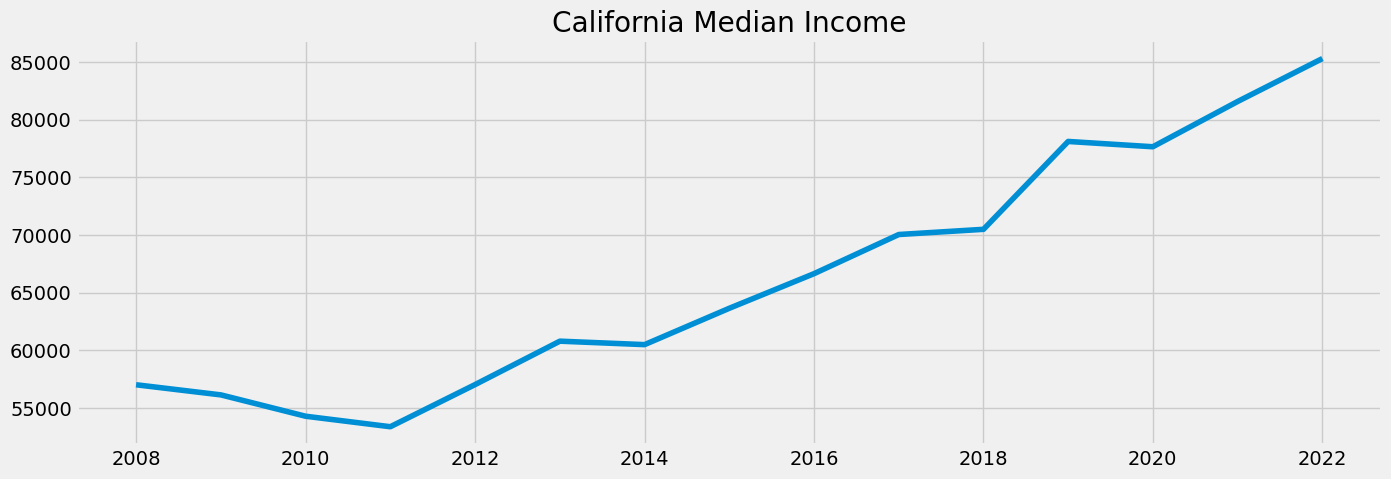

In [31]:
# Plot the new data set CA
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data.index, ca_data['Income'])
plt.title("California Median Income")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_income_ts_prep.png'), bbox_inches='tight')

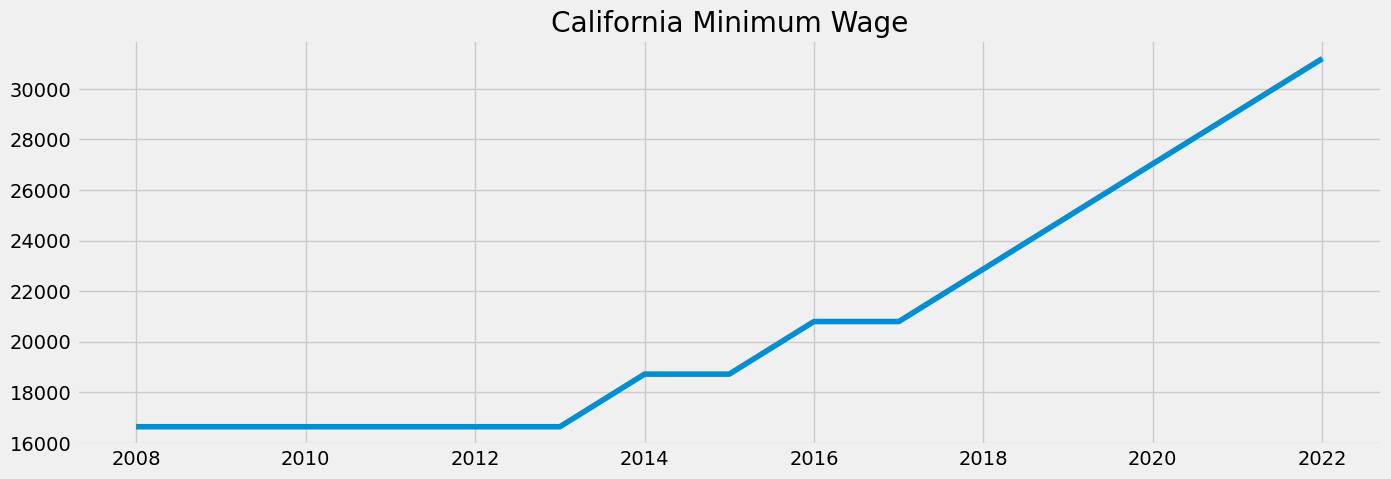

In [32]:
# Plot the new data set CA
plt.figure(figsize=(15,5), dpi=100)
plt.plot(ca_data.index, ca_data['Minimum_Wage_Yearly'])
plt.title("California Minimum Wage")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_wage_ts_prep.png'), bbox_inches='tight')

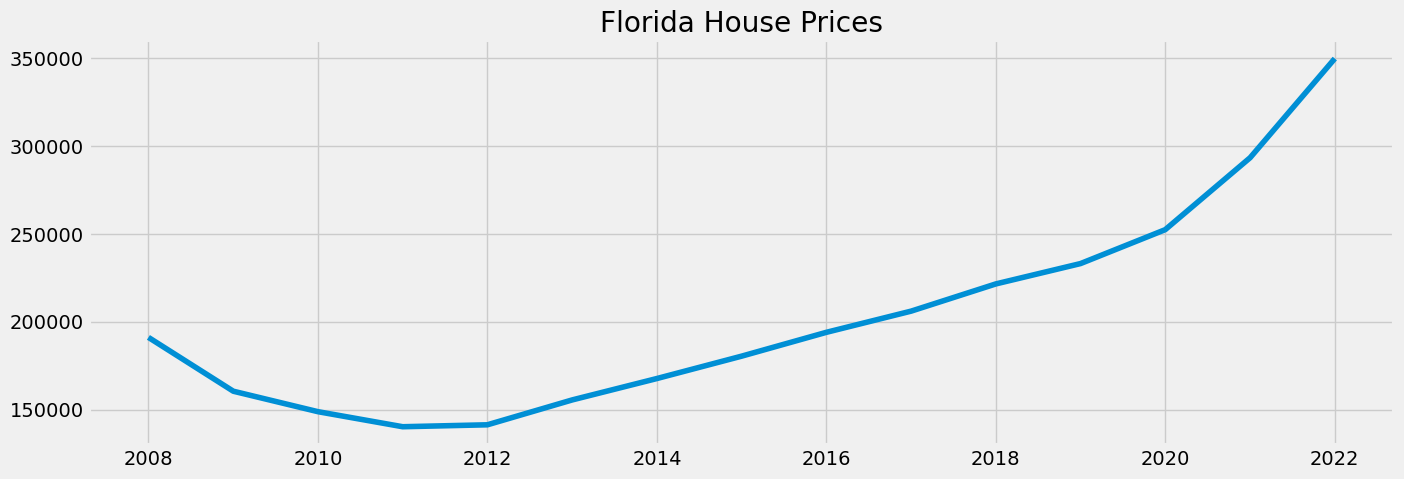

In [33]:
# Plot the new data set FL
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data.index, fl_data['House Cost'])
plt.title("Florida House Prices")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_house_ts_prep.png'), bbox_inches='tight')

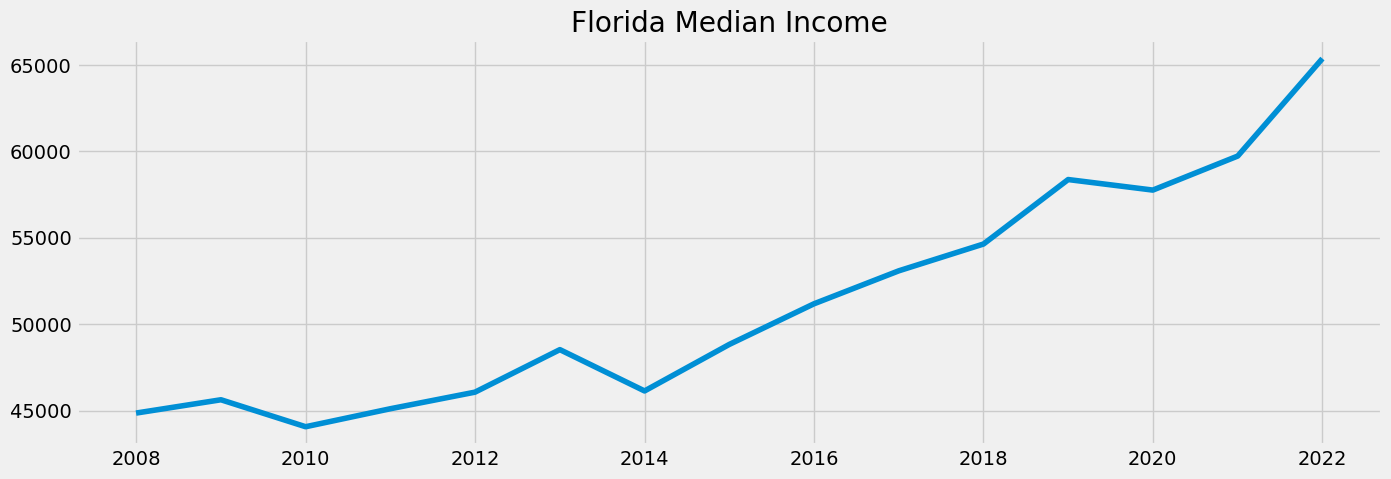

In [34]:
# Plot the new data set FL
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data.index, fl_data['Income'])
plt.title("Florida Median Income")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_income_ts_prep.png'), bbox_inches='tight')

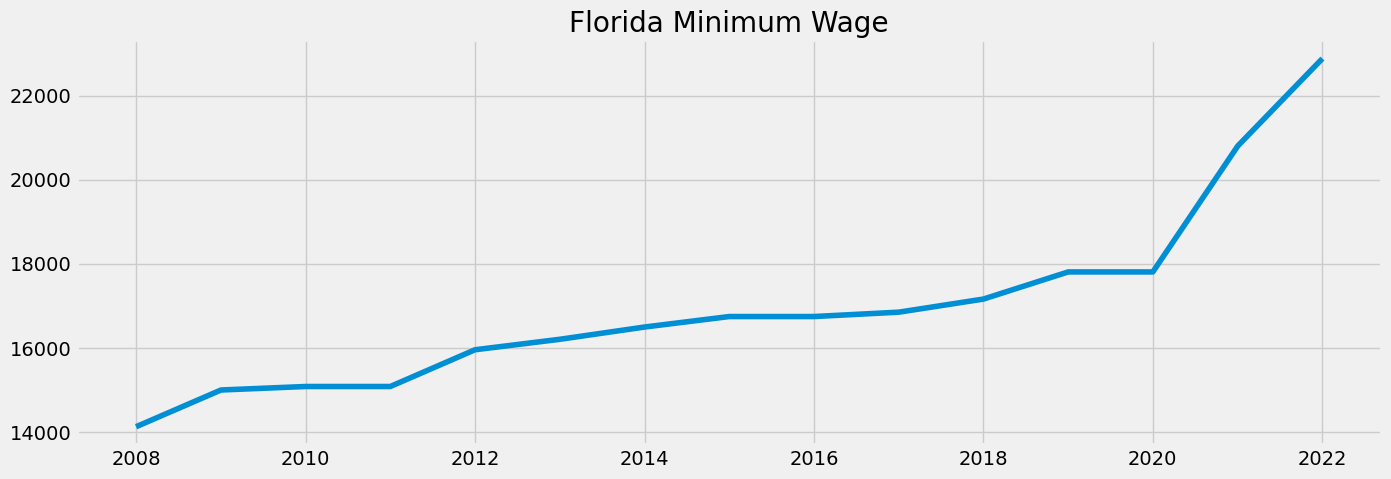

In [35]:
# Plot the new data set FL
plt.figure(figsize=(15,5), dpi=100)
plt.plot(fl_data.index, fl_data['Minimum_Wage_Yearly'])
plt.title("Florida Minimum Wage")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_wage_ts_prep.png'), bbox_inches='tight')

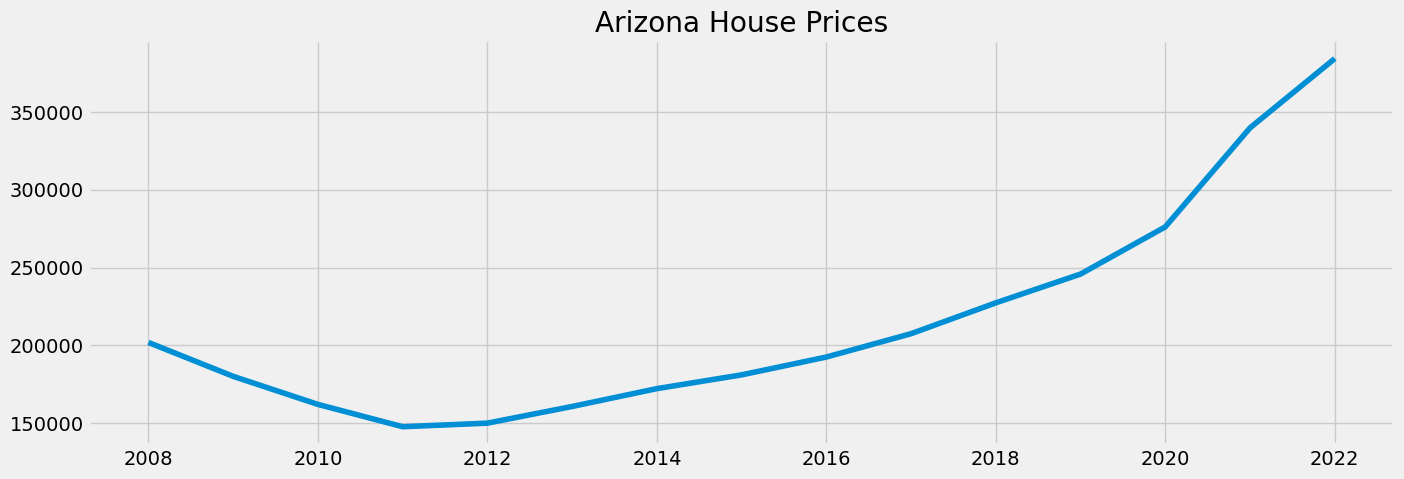

In [36]:
# Plot the new data set AZ
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data.index, az_data['House Cost'])
plt.title("Arizona House Prices")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_house_ts_prep.png'), bbox_inches='tight')

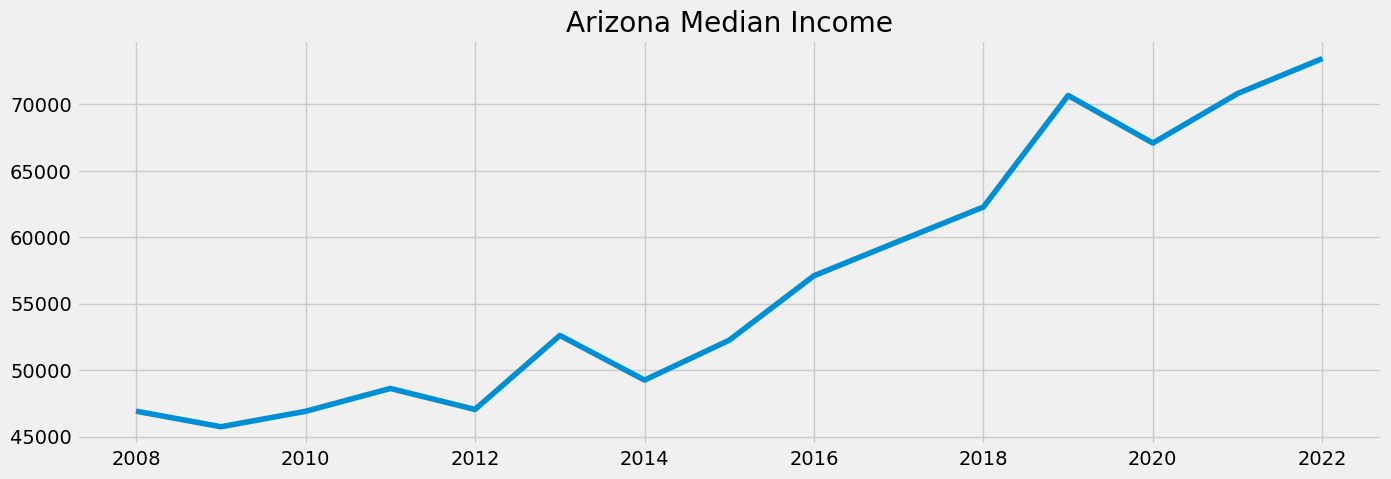

In [37]:
# Plot the new data set AZ
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data.index, az_data['Income'])
plt.title("Arizona Median Income")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_income_ts_prep.png'), bbox_inches='tight')

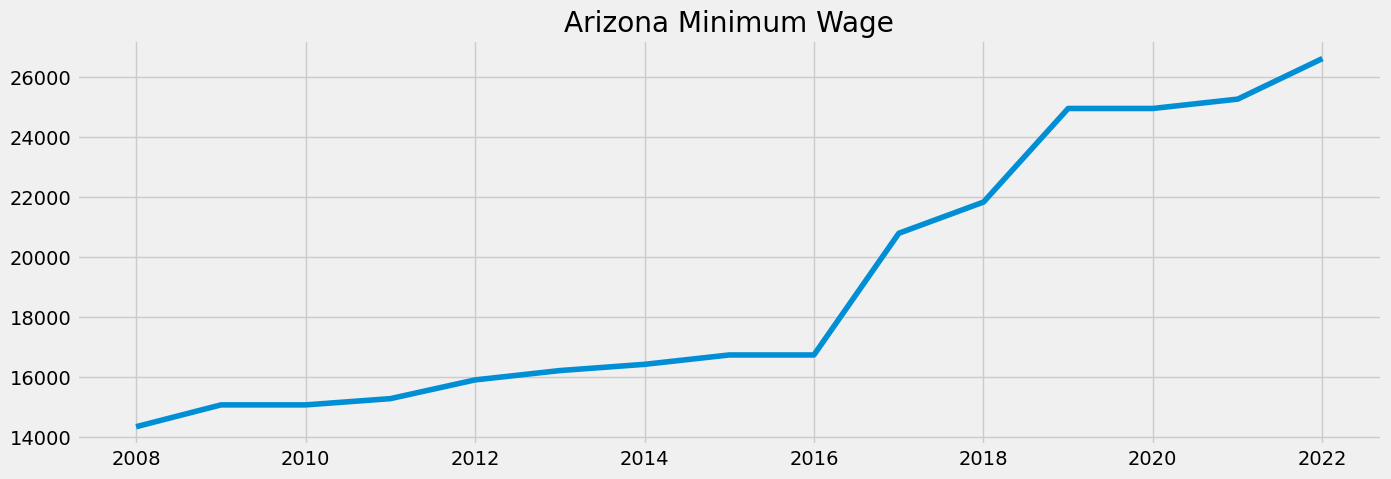

In [38]:
# Plot the new data set AZ
plt.figure(figsize=(15,5), dpi=100)
plt.plot(az_data.index, az_data['Minimum_Wage_Yearly'])
plt.title("Arizona Minimum Wage")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_wage_ts_prep.png'), bbox_inches='tight')

In [39]:
# Check for missing values 
ca_data.isnull().sum() 
fl_data.isnull().sum() 
az_data.isnull().sum()

State                  0
House Cost             0
Income                 0
State_Minimum_Wage     0
Multiplied_Income      0
Minimum_Wage_Yearly    0
dtype: int64

In [40]:
# Check for duplicates
dups = ca_data.duplicated()
dups.sum()

0

In [41]:
# Check for duplicates
dups = fl_data.duplicated()
dups.sum()

0

In [42]:
# Check for duplicates
dups = az_data.duplicated()
dups.sum()

0

## Time-Series Analysis: Decomposition

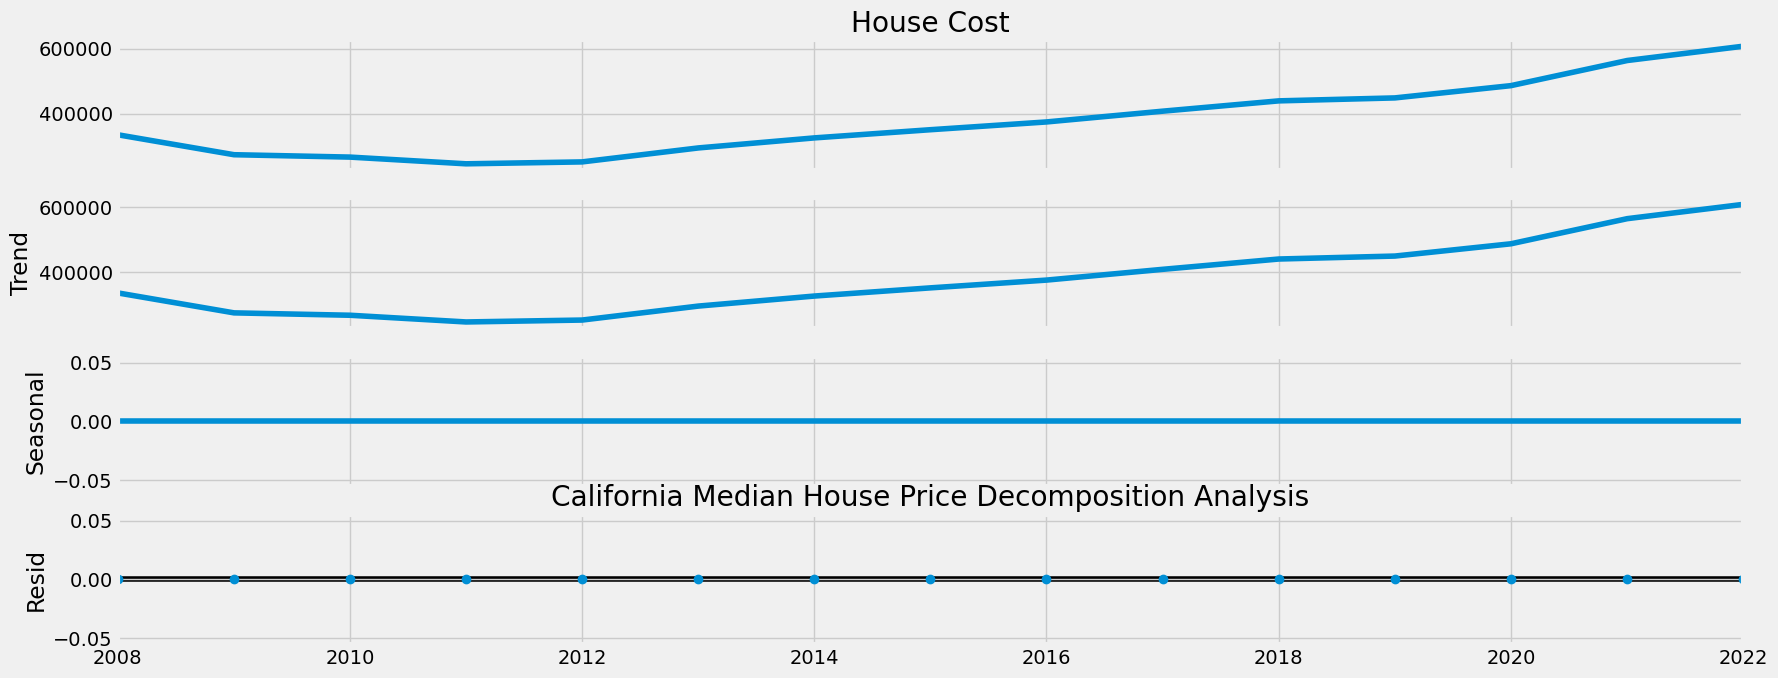

In [43]:
# Decompose the time series using an additive model
decompositionCAh = sm.tsa.seasonal_decompose(ca_data['House Cost'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionCAh.plot()
plt.title("California Median House Price Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_house_ts_analysis.png'), bbox_inches='tight')
plt.show()

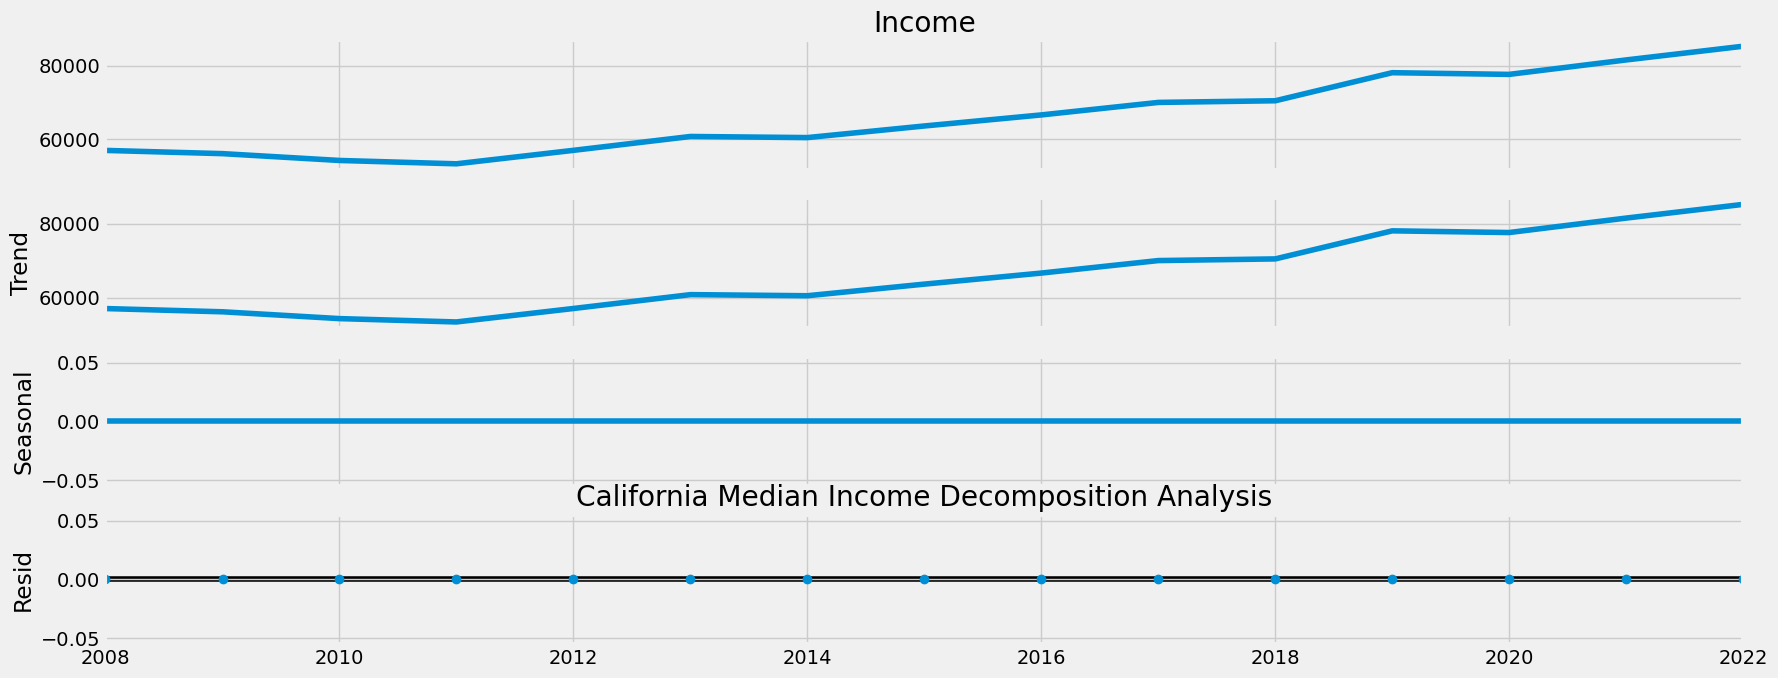

In [44]:
# Decompose the time series using an additive model
decompositionCAi = sm.tsa.seasonal_decompose(ca_data['Income'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionCAi.plot()
plt.title("California Median Income Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_income_ts_analysis.png'), bbox_inches='tight')
plt.show()

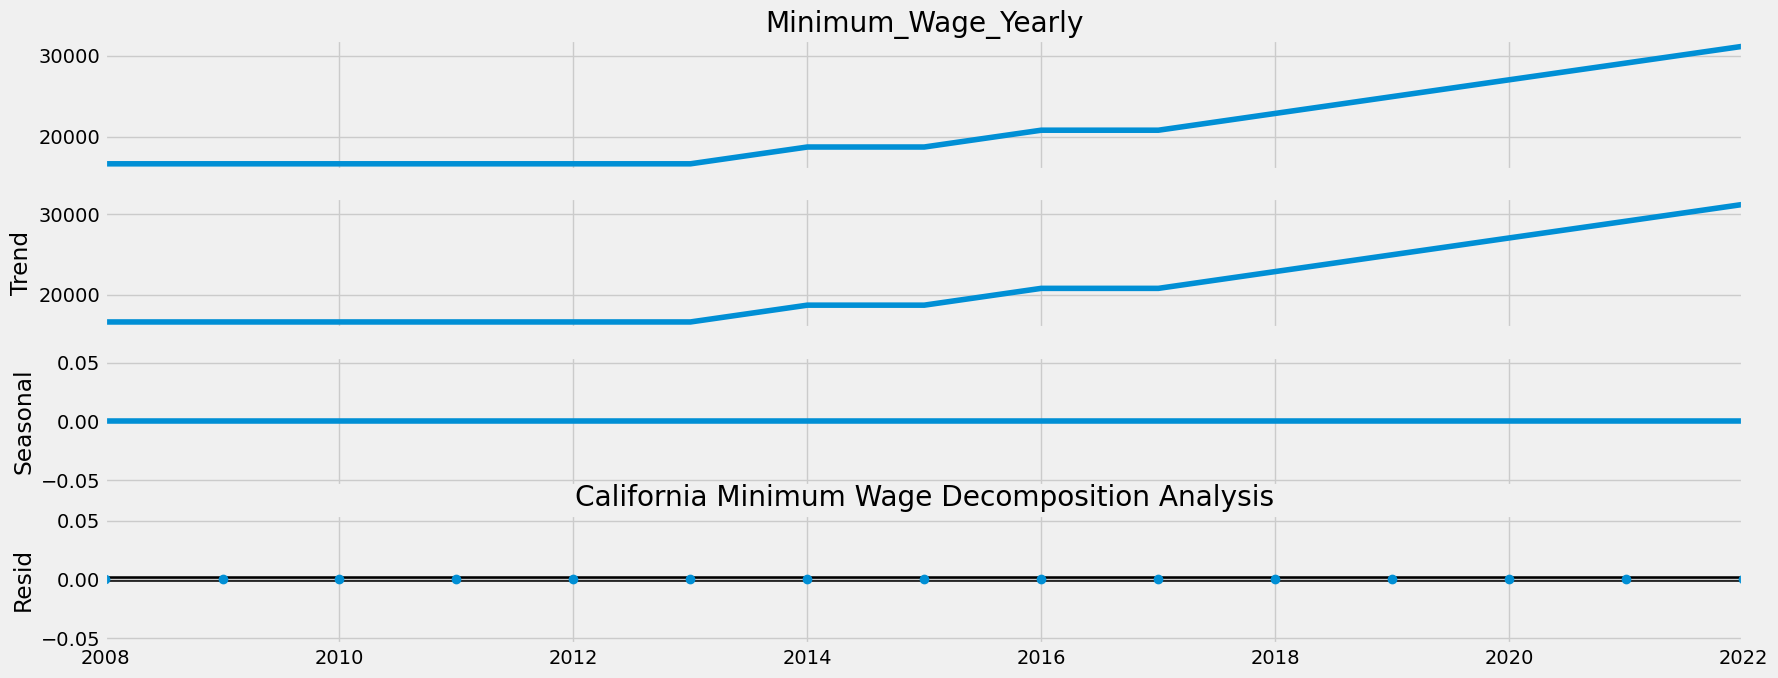

In [45]:
# Decompose the time series using an additive model
decompositionCAw = sm.tsa.seasonal_decompose(ca_data['Minimum_Wage_Yearly'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionCAw.plot()
plt.title("California Minimum Wage Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_wage_ts_analysis.png'), bbox_inches='tight')
plt.show()

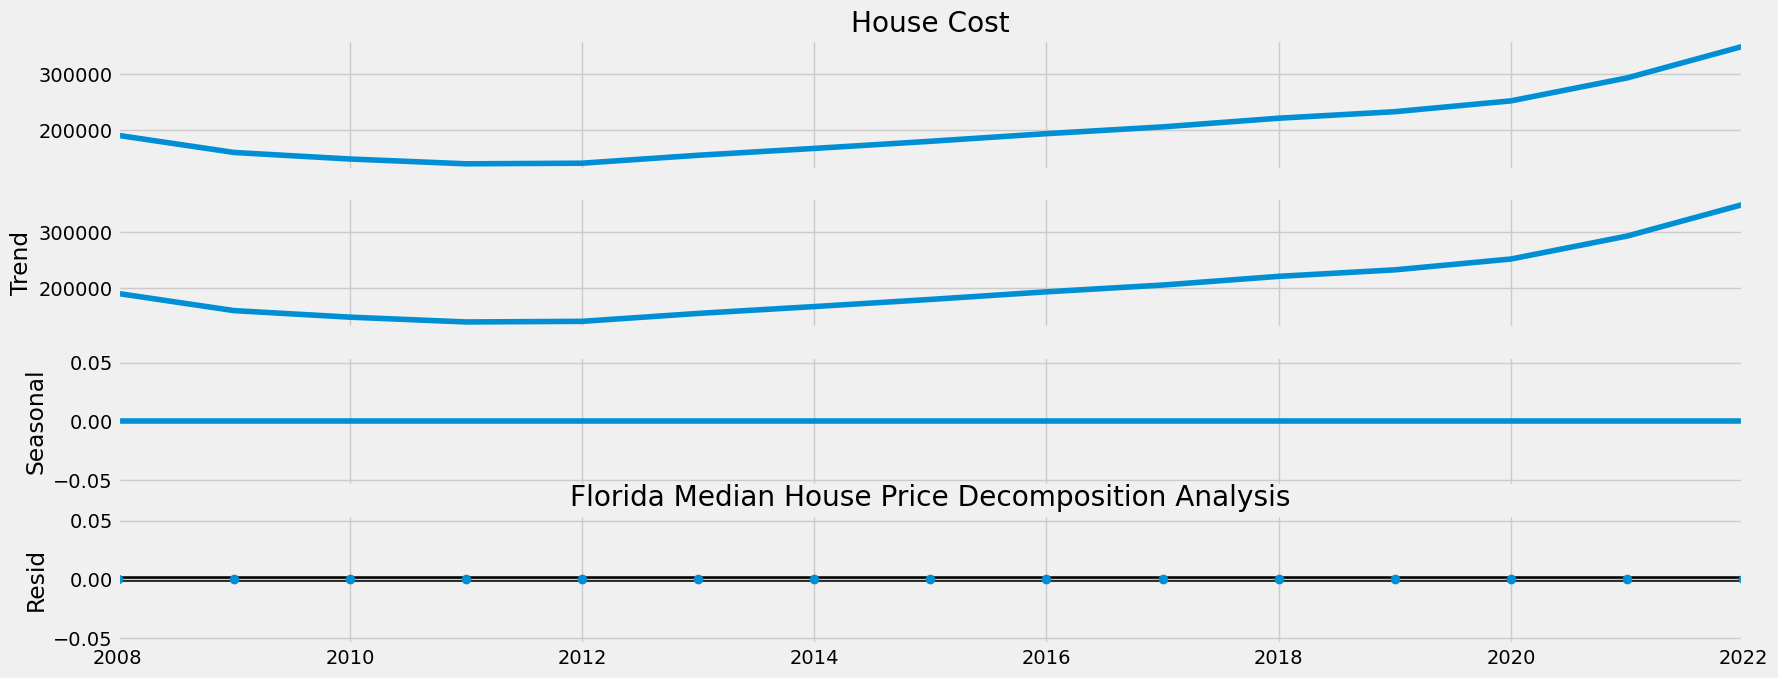

In [46]:
# Decompose the time series using an additive model
decompositionFLh = sm.tsa.seasonal_decompose(fl_data['House Cost'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionFLh.plot()
plt.title("Florida Median House Price Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_house_ts_analysis.png'), bbox_inches='tight')
plt.show()

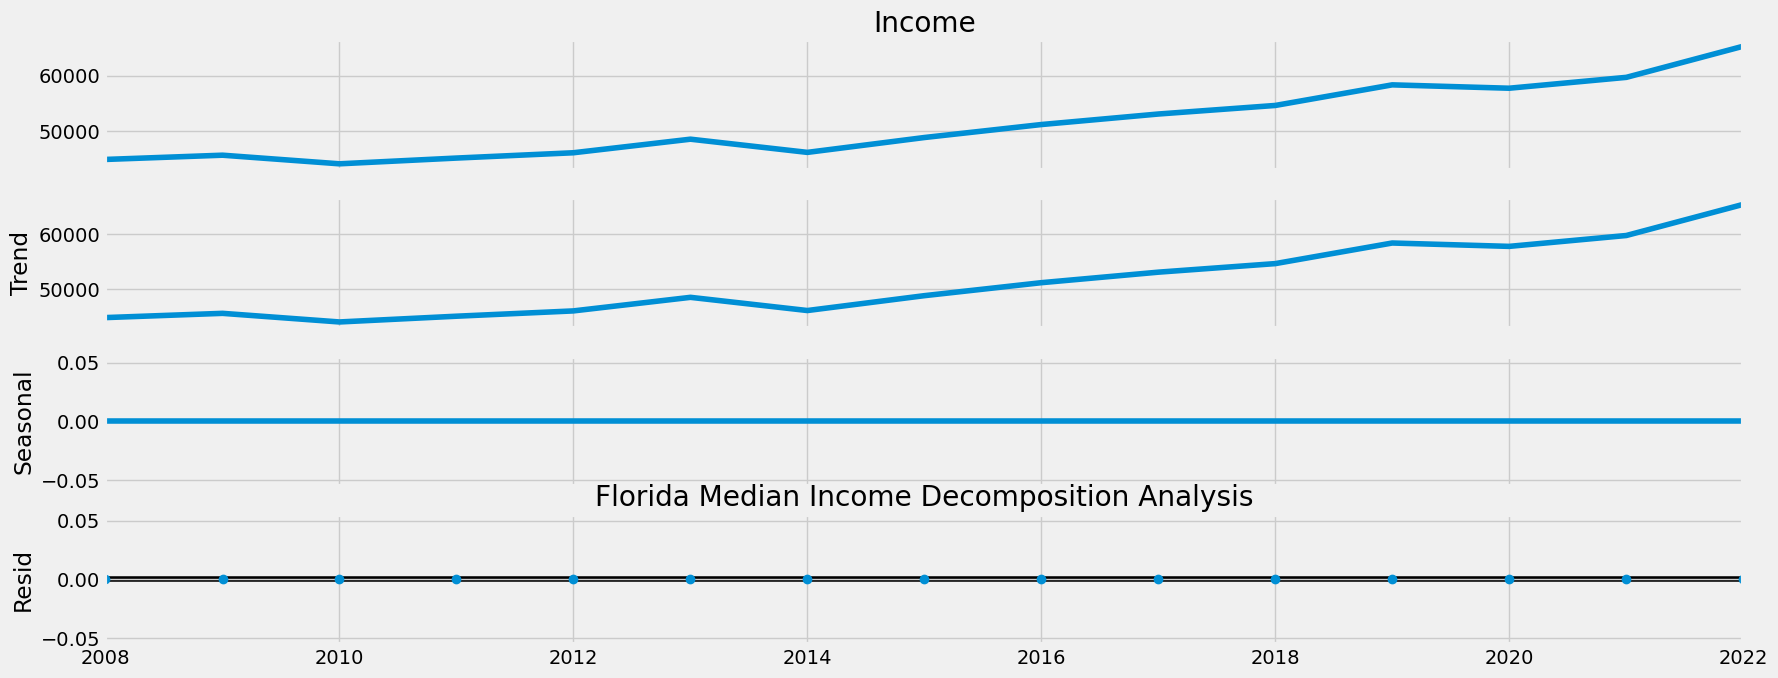

In [47]:
# Decompose the time series using an additive model
decompositionFLi = sm.tsa.seasonal_decompose(fl_data['Income'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionFLi.plot()
plt.title("Florida Median Income Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_income_ts_analysis.png'), bbox_inches='tight')
plt.show()

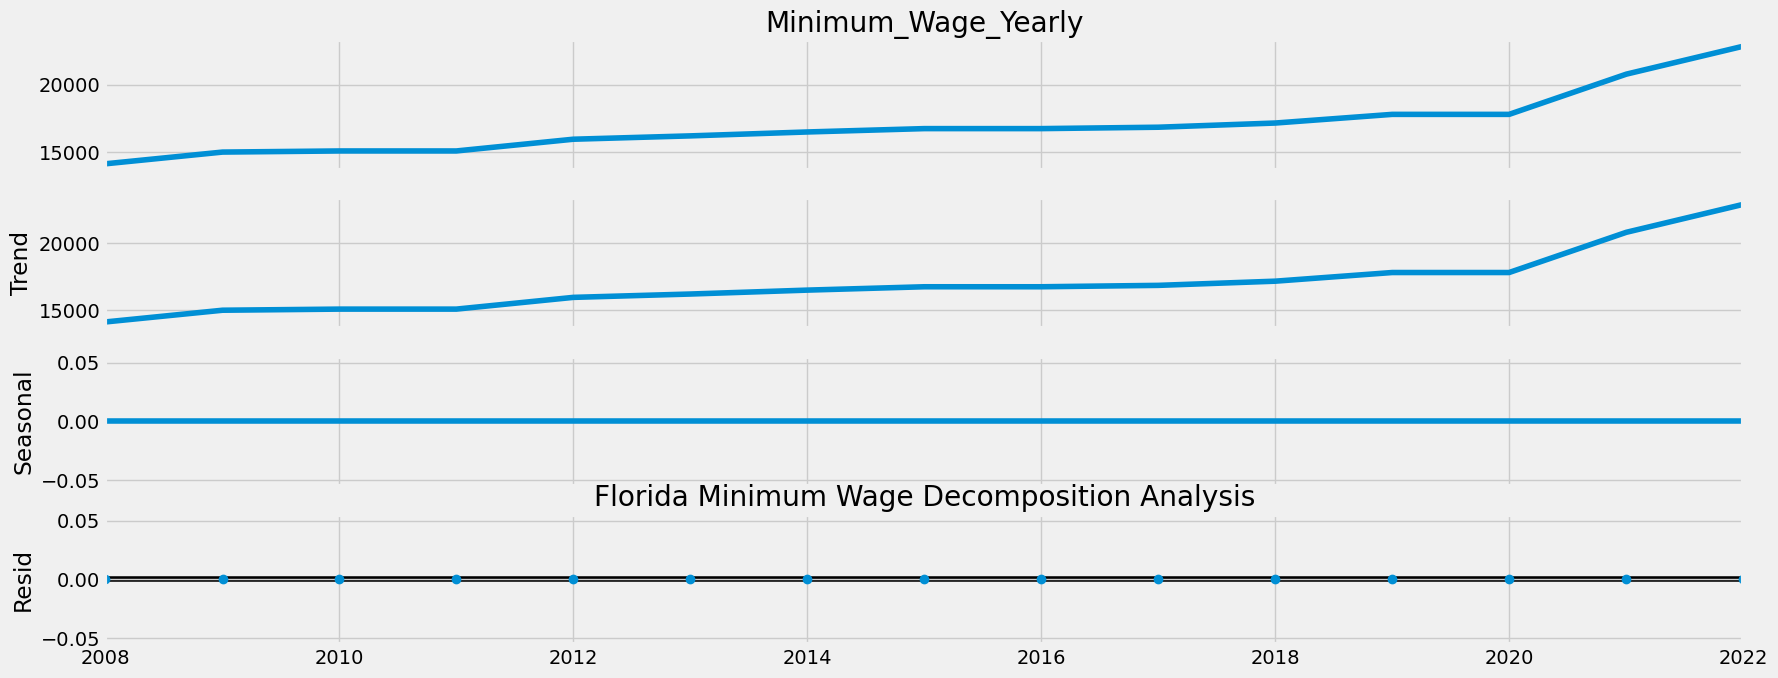

In [48]:
# Decompose the time series using an additive model
decompositionFLw = sm.tsa.seasonal_decompose(fl_data['Minimum_Wage_Yearly'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionFLw.plot()
plt.title("Florida Minimum Wage Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_wage_ts_analysis.png'), bbox_inches='tight')
plt.show()

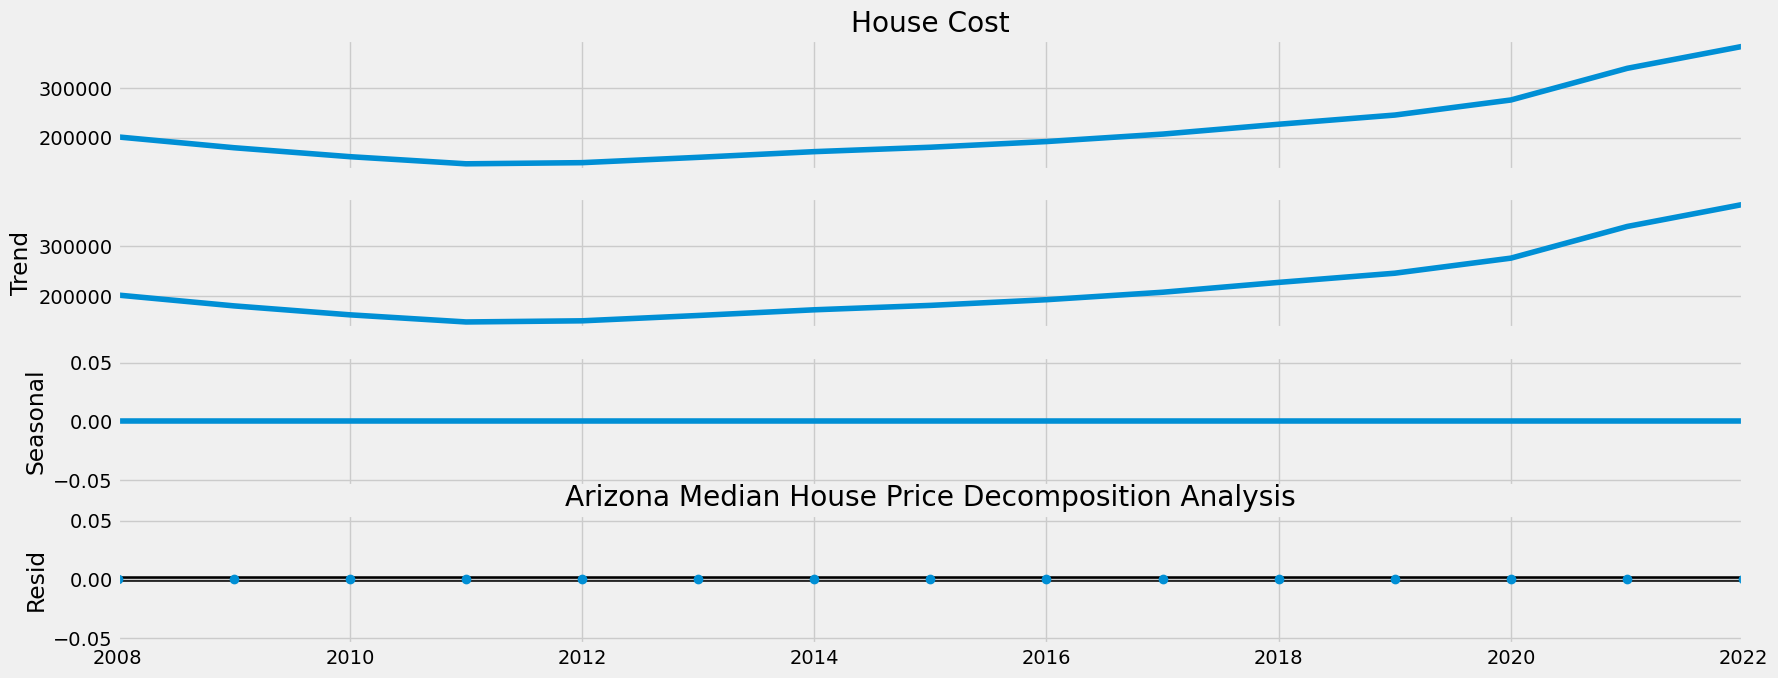

In [49]:
# Decompose the time series using an additive model
decompositionAZh = sm.tsa.seasonal_decompose(az_data['House Cost'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionAZh.plot()
plt.title("Arizona Median House Price Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_house_ts_analysis.png'), bbox_inches='tight')
plt.show()

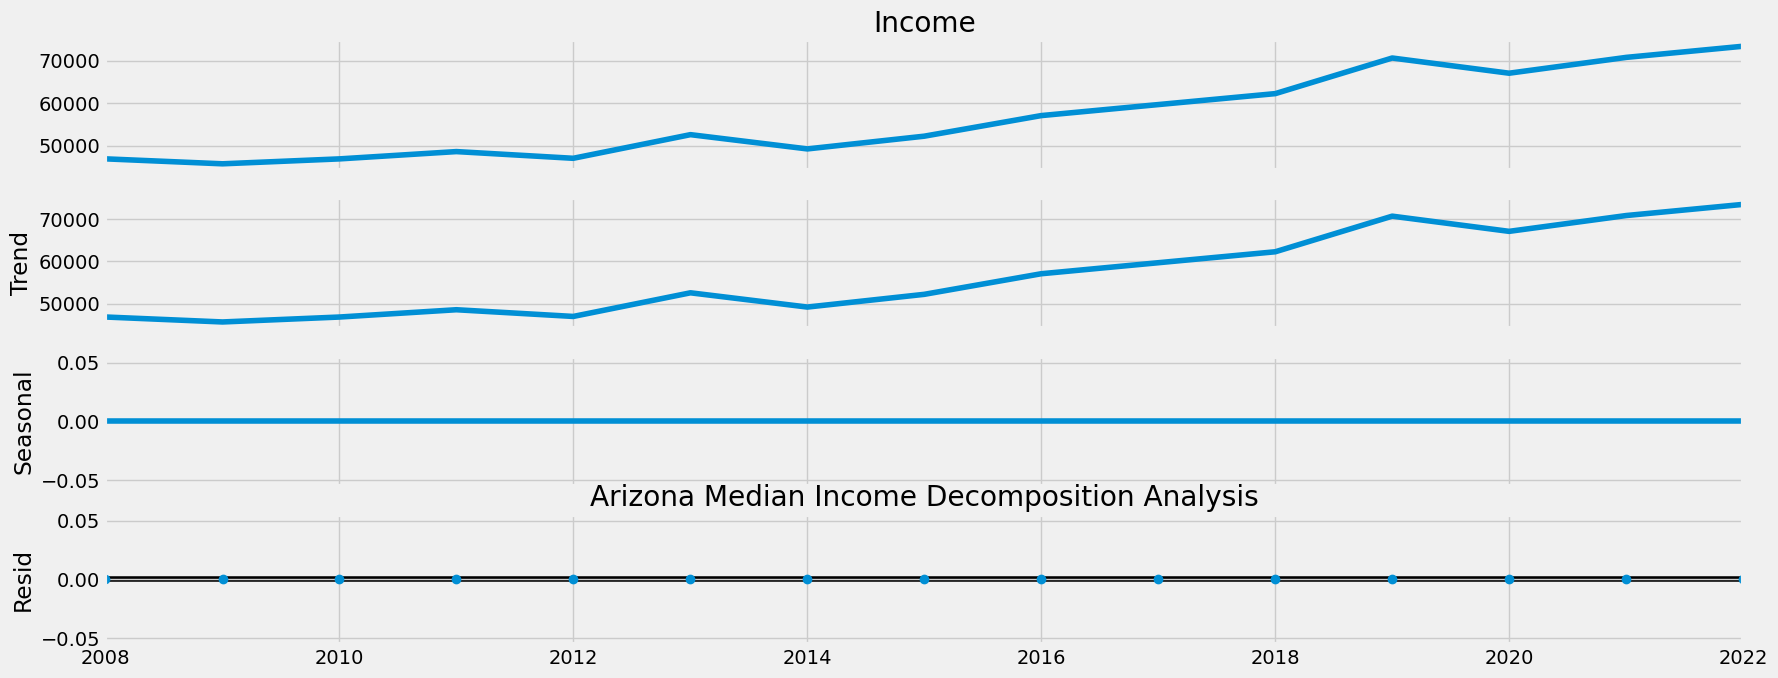

In [50]:
# Decompose the time series using an additive model
decompositionAZi = sm.tsa.seasonal_decompose(az_data['Income'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionAZi.plot()
plt.title("Arizona Median Income Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_income_ts_analysis.png'), bbox_inches='tight')
plt.show()

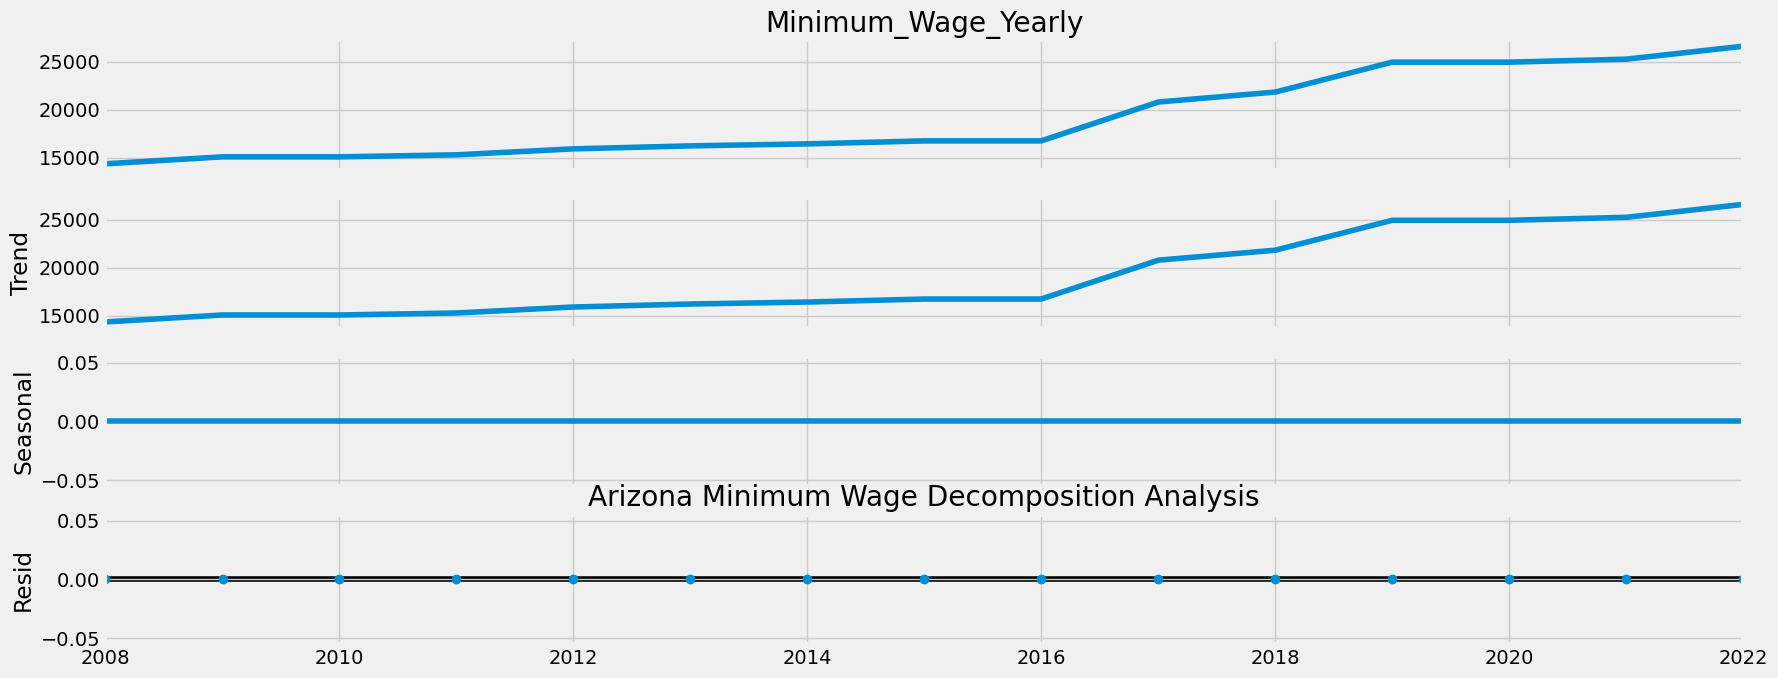

In [51]:
# Decompose the time series using an additive model
decompositionAZw = sm.tsa.seasonal_decompose(az_data['Minimum_Wage_Yearly'], model='additive')
rcParams['figure.figsize'] = 18, 7
decompositionAZw.plot()
plt.title("Arizona Minimum Wage Decomposition Analysis")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_wage_ts_analysis.png'), bbox_inches='tight')
plt.show()

## Testing for Stationary

In [52]:
def dickey_fuller(timeseries): # Define the function, Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [53]:
dickey_fuller(ca_data['House Cost'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.667351
p-value                         0.989163
Number of Lags Used             2.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [64]:
dickey_fuller(ca_data['Income'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.088902
p-value                         0.995121
Number of Lags Used             3.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [54]:
dickey_fuller(ca_data['Minimum_Wage_Yearly'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.507557
p-value                        0.997552
Number of Lags Used            5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [55]:
dickey_fuller(fl_data['House Cost'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.318709
p-value                         0.998967
Number of Lags Used             1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [56]:
dickey_fuller(fl_data['Income'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.066715
p-value                         0.998754
Number of Lags Used             2.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [57]:
dickey_fuller(az_data['Minimum_Wage_Yearly'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.458136
p-value                         0.983544
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


In [58]:
dickey_fuller(az_data['House Cost'])

Dickey-Fuller Stationarity test:
Test Statistic                 4.626993
p-value                        1.000000
Number of Lags Used            5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [59]:
dickey_fuller(az_data['Income'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.756048
p-value                         0.990893
Number of Lags Used             1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64


In [60]:
dickey_fuller(az_data['Minimum_Wage_Yearly'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.458136
p-value                         0.983544
Number of Lags Used             0.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


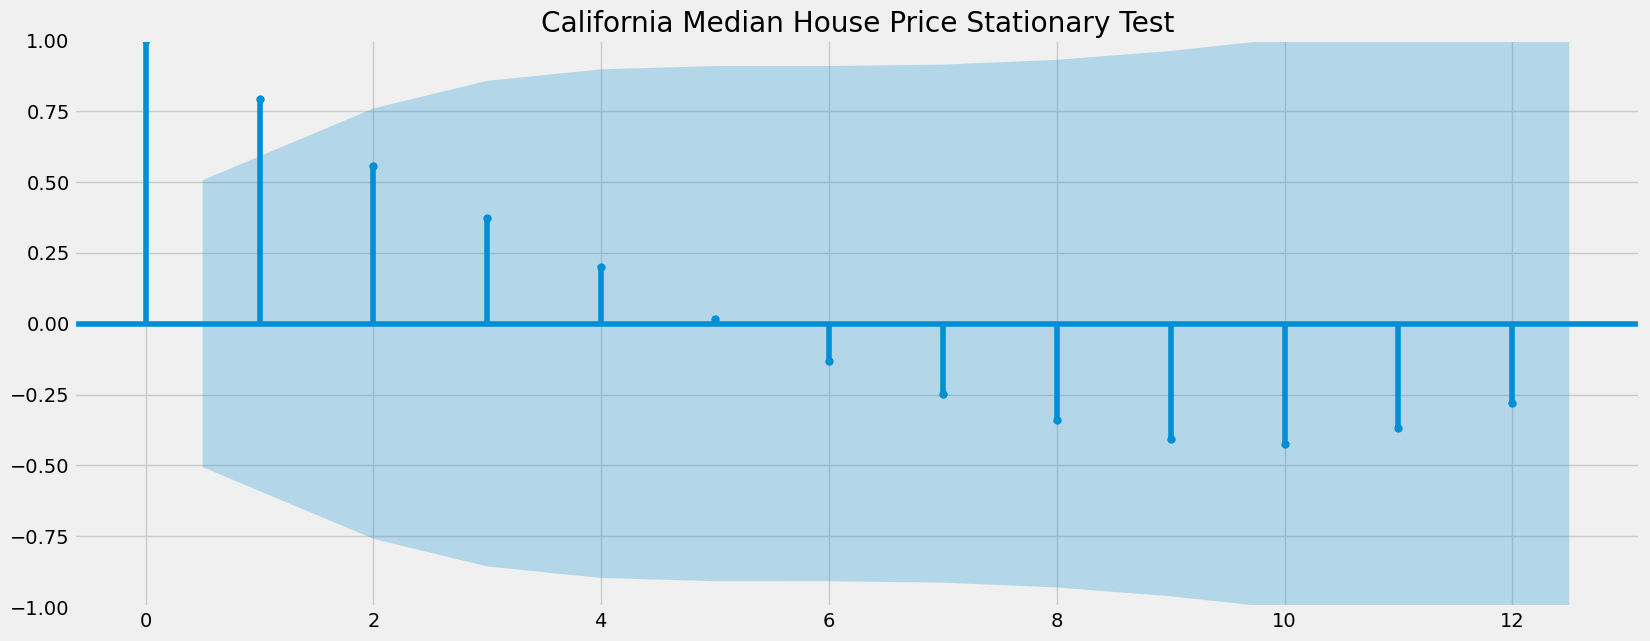

In [61]:
# Plot Autocorrelations
plot_acf(ca_data['House Cost'])
plt.title("California Median House Price Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_house_ts_DFtest.png'), bbox_inches='tight')
plt.show()

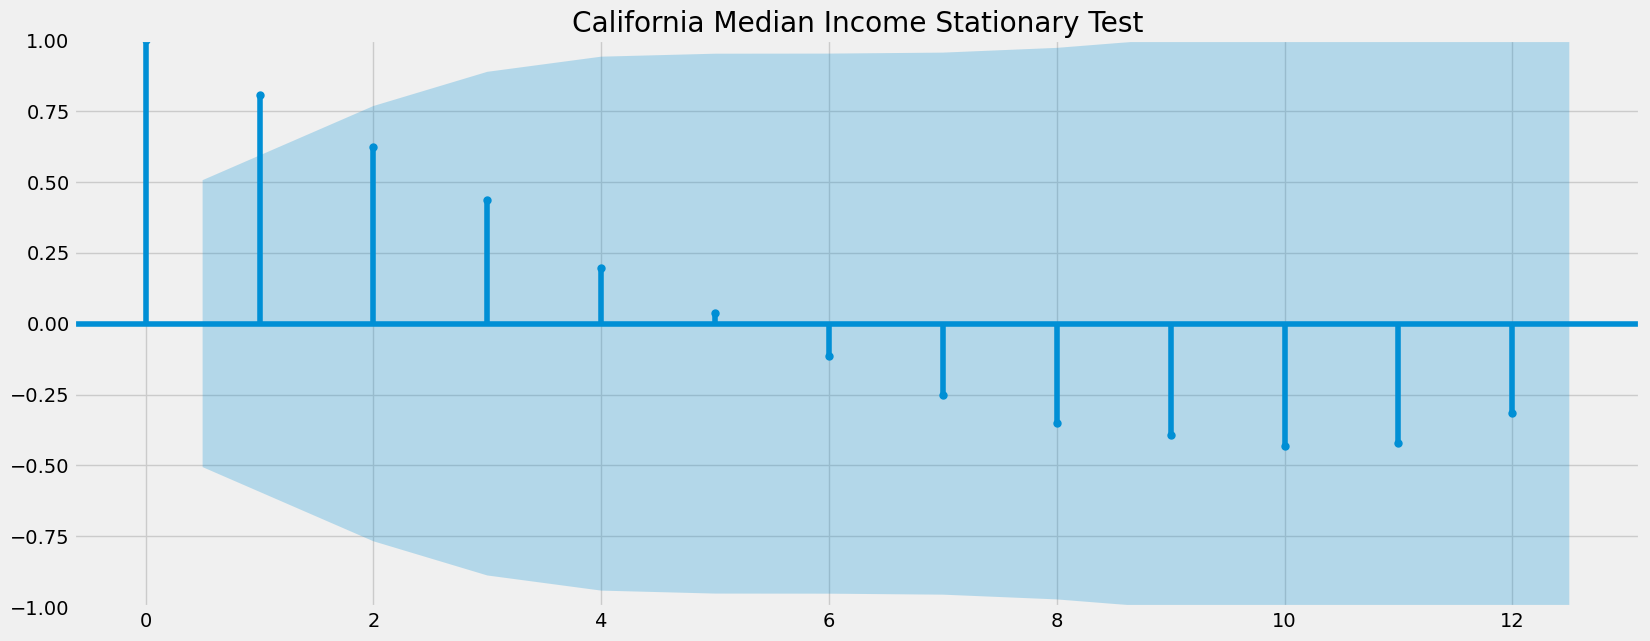

In [62]:
# Plot Autocorrelations
plot_acf(ca_data['Income'])
plt.title("California Median Income Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_income_ts_DFtest.png'), bbox_inches='tight')
plt.show()

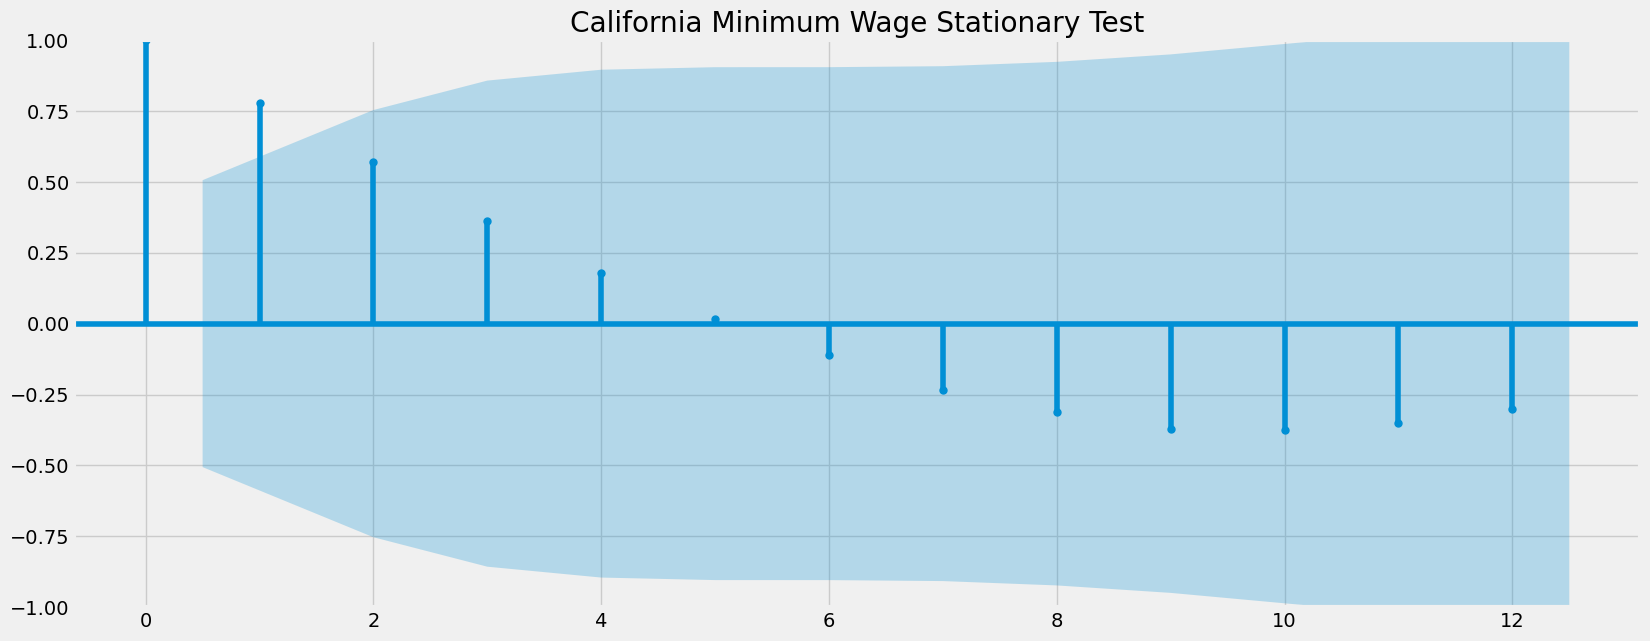

In [63]:
# Plot Autocorrelations
plot_acf(ca_data['Minimum_Wage_Yearly'])
plt.title("California Minimum Wage Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CA_wage_ts_DFtest.png'), bbox_inches='tight')
plt.show()

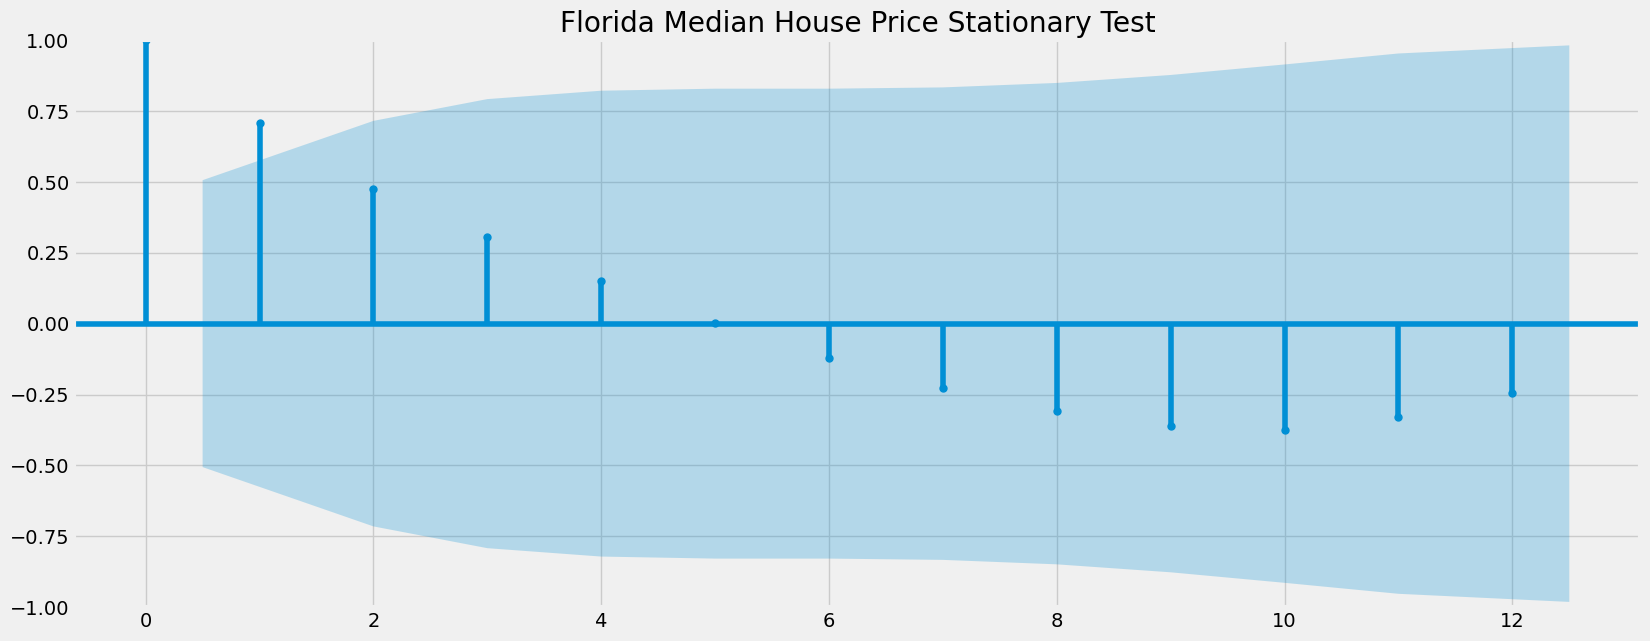

In [64]:
# Plot Autocorrelations
plot_acf(fl_data['House Cost'])
plt.title("Florida Median House Price Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_house_ts_DFtest.png'), bbox_inches='tight')
plt.show()

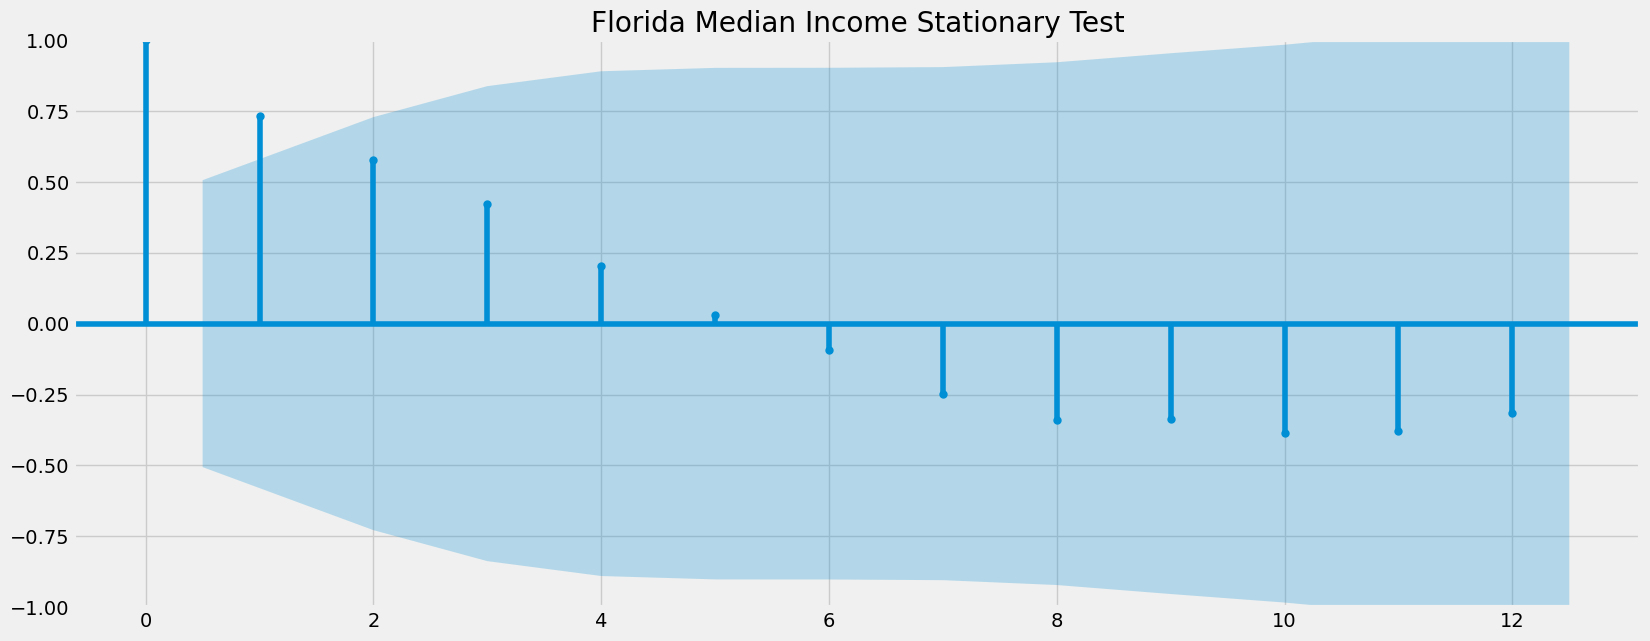

In [65]:
# Plot Autocorrelations
plot_acf(fl_data['Income'])
plt.title("Florida Median Income Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_income_ts_DFtest.png'), bbox_inches='tight')
plt.show()

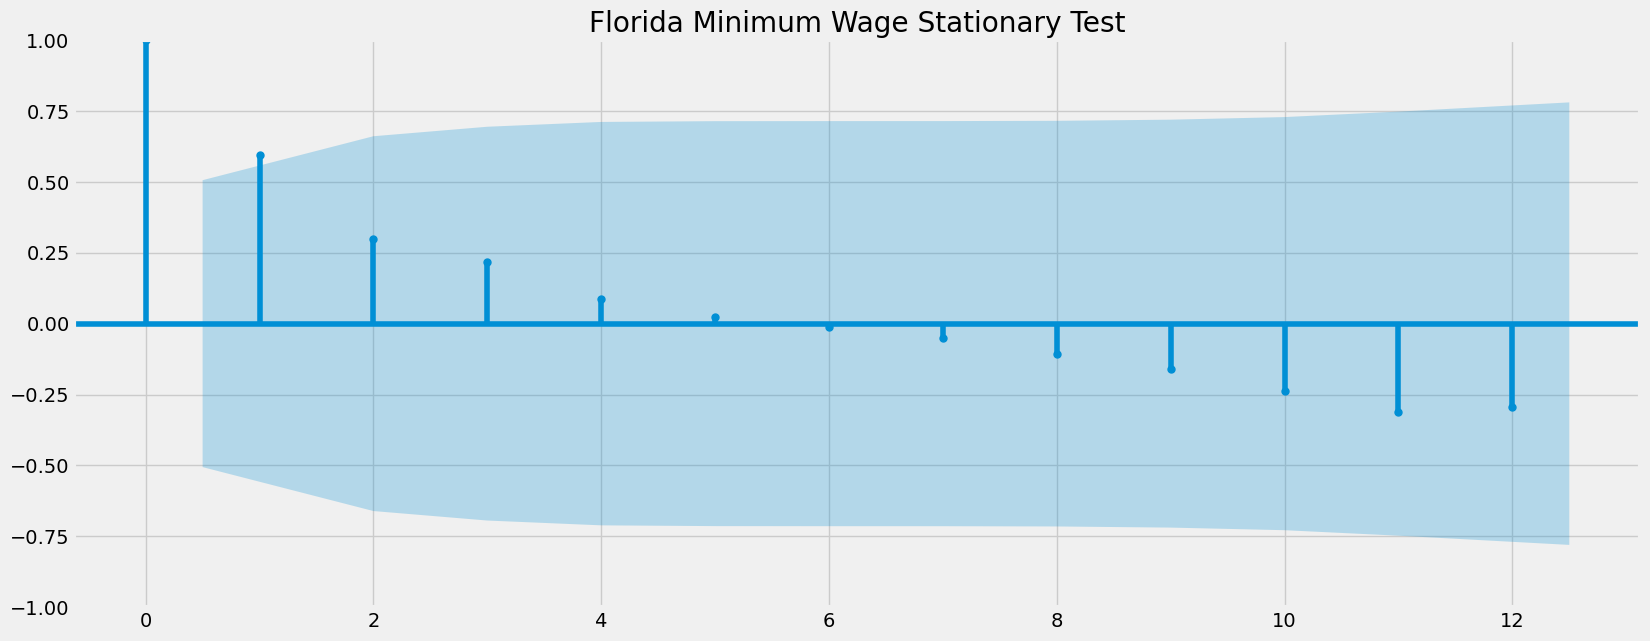

In [66]:
# Plot Autocorrelations
plot_acf(fl_data['Minimum_Wage_Yearly'])
plt.title("Florida Minimum Wage Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'FL_wage_ts_DFtest.png'), bbox_inches='tight')
plt.show()

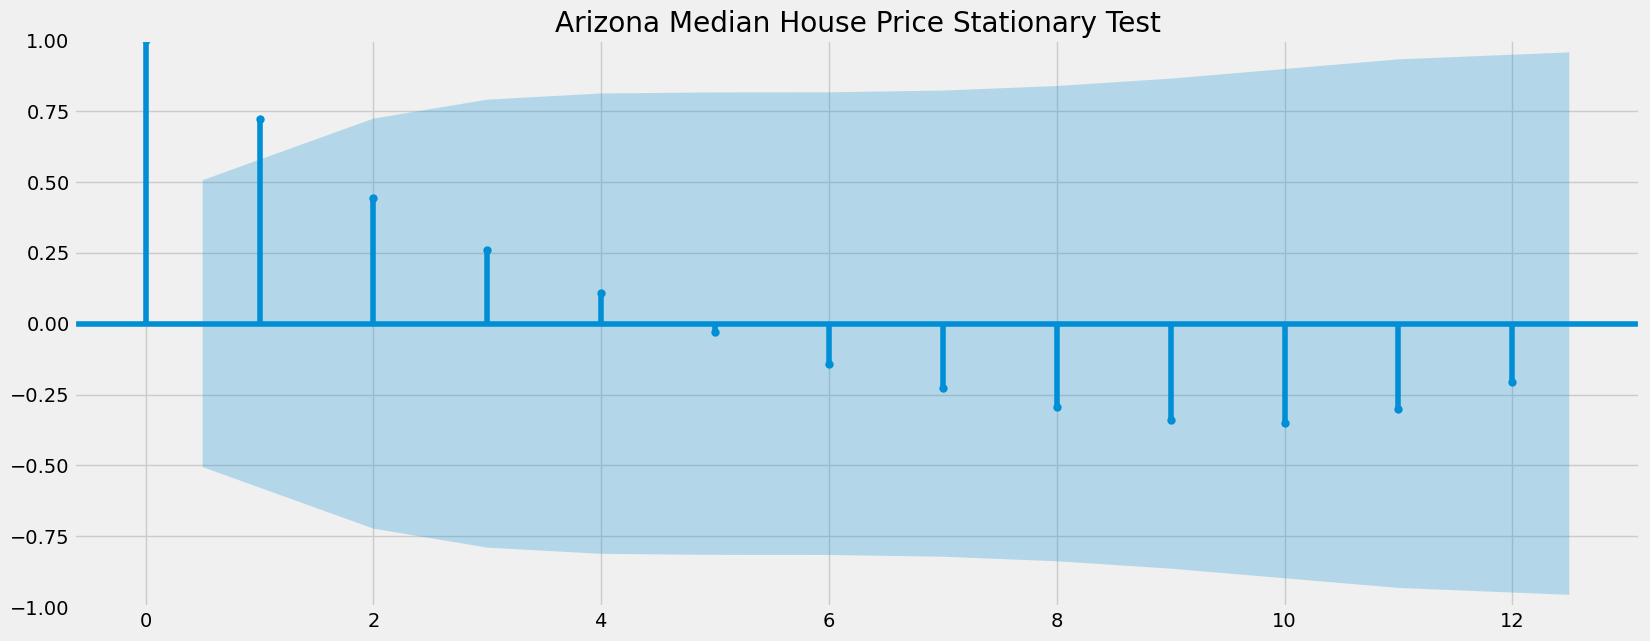

In [67]:
# Plot Autocorrelations
plot_acf(az_data['House Cost'])
plt.title("Arizona Median House Price Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_house_ts_DFtest.png'), bbox_inches='tight')
plt.show()

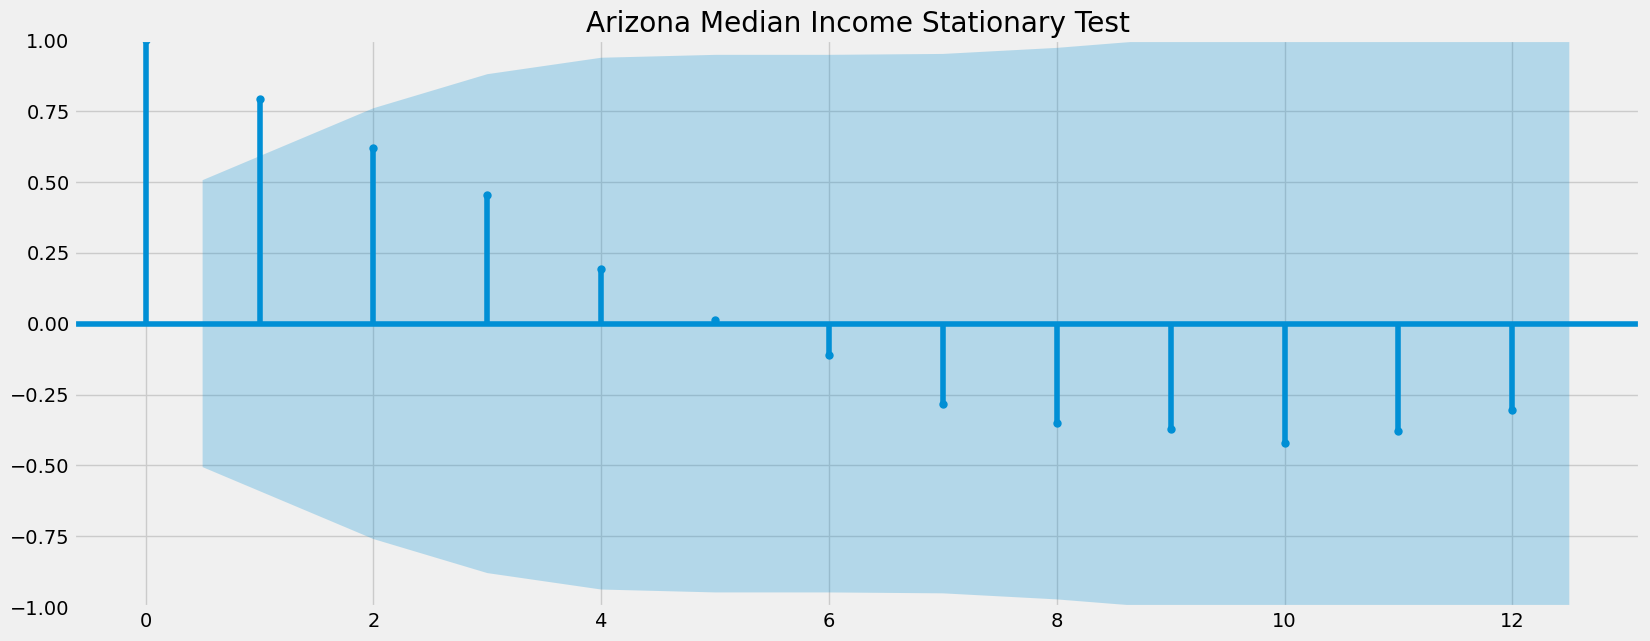

In [68]:
# Plot Autocorrelations
plot_acf(az_data['Income'])
plt.title("Arizona Median Income Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_income_ts_DFtest.png'), bbox_inches='tight')
plt.show()

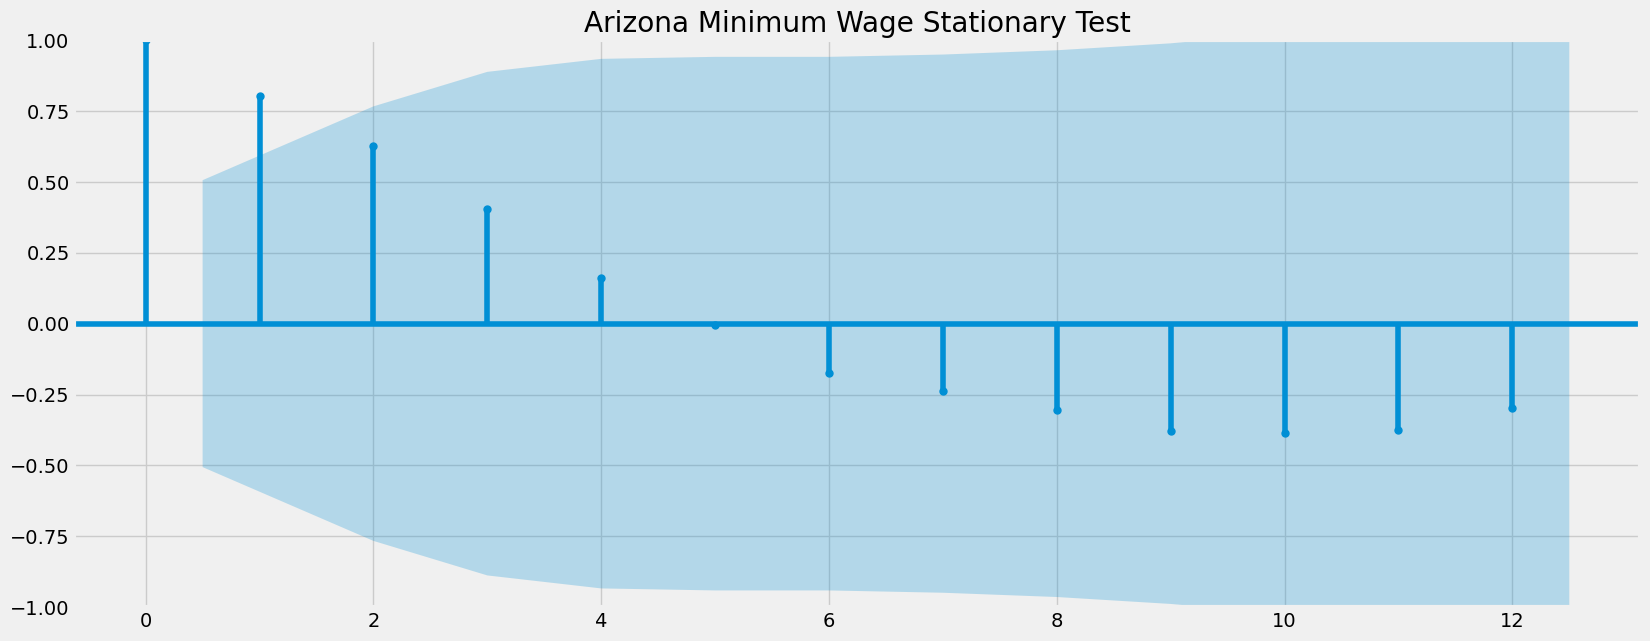

In [69]:
# Plot Autocorrelations
plot_acf(az_data['Minimum_Wage_Yearly'])
plt.title("Arizona Minimum Wage Stationary Test")
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'AZ_wage_ts_DFtest.png'), bbox_inches='tight')
plt.show()

## Stationarizing the Data

With the tests done above, it seems as if the data is stationary and this step is not necessary